<h1 align ='center'>Fraud/Anomaly Detection Project</h1>

## Introduction

### Fraud/Anomaly Detection 
Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

### Objective
To explore the state-of-the-art in unsupervised learning, including various anomaly detection algorithms and to establish some standard processes for the selection, evaluation and potential
combination of these algorithms.

### Techniques Used
In this jupyter notebook we are going to take the credit card data as the case study for exploring the following algorithms -
<ul>
<li>Isolation Forest (as baseline) </li>
<li>Nearest Neighbor based Local Outlier Factor</li>
<li>Clustering-based Local Outlier Factor</li>
<li>One-Class SVM   </li>
<li>Autoencoders</li>
<li>Restricted Boltzmann Machines (RBM)</li>
</ul>

###Dataset
The dataset that is used for credit card fraud detection is derived from the following Kaggle URL :

https://www.kaggle.com/mlg-ulb/creditcardfraud

- The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

- The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.


## Preprocessing

### Import Libraries 


In [ ]:
# Load general utilities
# ----------------------
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import pickle

# Load utilities
# ----------------------
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import recall_score, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
!pip install pyod
from pyod.models.cblof import CBLOF
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


# Imports used for Auto-Encoder
# ----------------------
'''
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from scipy import stats
'''

# Imports used for Restricted Boltzmann Machines
# ----------------------
from tensorflow.python.framework import ops

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 2.1MB 16.0MB/s 
  Created wheel for pyod: filename=pyod-0.8.1-cp36-none-any.whl size=105653 sha256=2a37058b1b051c091b0700d504d7a09291c516b95f4bd6dbbfc4da60712b8d4f
  Stored in directory: /root/.cache/pip/wheels/2e/ca/18/727e9d98a41f5f4385a97d5b429f3a9c8fbee13f9780c18642
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42111 sha256=d4f0a1f4398e737f88872765920731dfaa6dbe357f4766c6fe969e2dd9cfdaf2
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=930f568b0f20c11cc7d5fc5836a5a99fd5f76feb615ea67b3eab3b3a79dd17aa
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [ ]:
# Mounting drive
# Data is accessed from the drive and all read-write operations happen in the drive
# so that they are accessible from everywhere 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Specifying the directory path where dataset is placed
kartik_dir = 'drive/My Drive/PwC Intern/Anomaly Detection on Credit Card Data/Dataset/'
syed_dir = '/content/drive/My Drive/'
mandar_dir = 'drive/My Drive/PwC Intern/Anomaly Detection on Credit Card Data/'
final_dir = syed_dir #Change this to conect to your directory

### Reading the dataset

In [ ]:
# Reading the credit card data
data = pd.read_csv(final_dir+'input/creditcard.csv',sep=',')

# Print column names
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


### Exploratory Data Analysis

In [ ]:
# Data summary
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Print number of rows and columns
data.shape

(284807, 31)

Check the missing values in the dataset

In [ ]:
# Check for null values
data.isnull().values.any()

False

In [ ]:
# Look at first few rows in the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


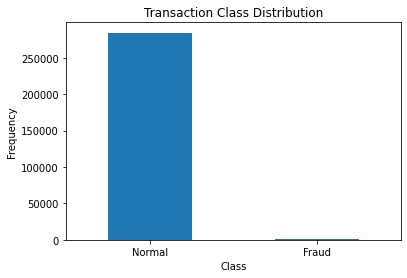

In [ ]:
# Plotting distributions of class labels
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Determine the number of fraud and valid transactions in the entire dataset.

In [ ]:
# Filtering fraud and normal transactions
Fraud = data[data['Class']==1]

Normal = data[data['Class']==0]

How different are the amount of money used in different transaction classes?

In [ ]:
# Distribution of amount for fraud transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Distribution of amount for normal transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Let's have a more graphical representation of the data

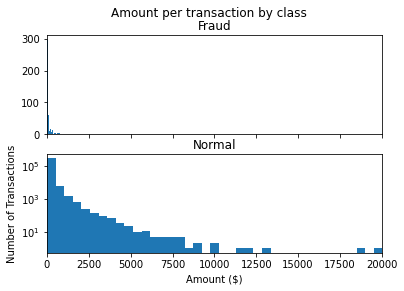

In [ ]:
# Distribution of amount for both classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

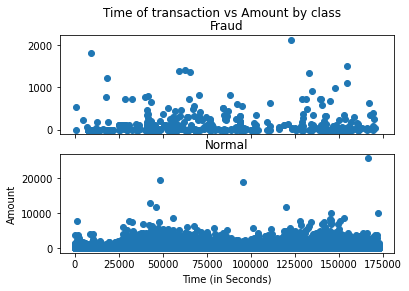

In [ ]:
# Distribution of time for both classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Doesn't seem like the time of transaction really matters here as per above observation.
Now let us take a sample of the dataset for out modelling and prediction

Plot histogram of each parameter

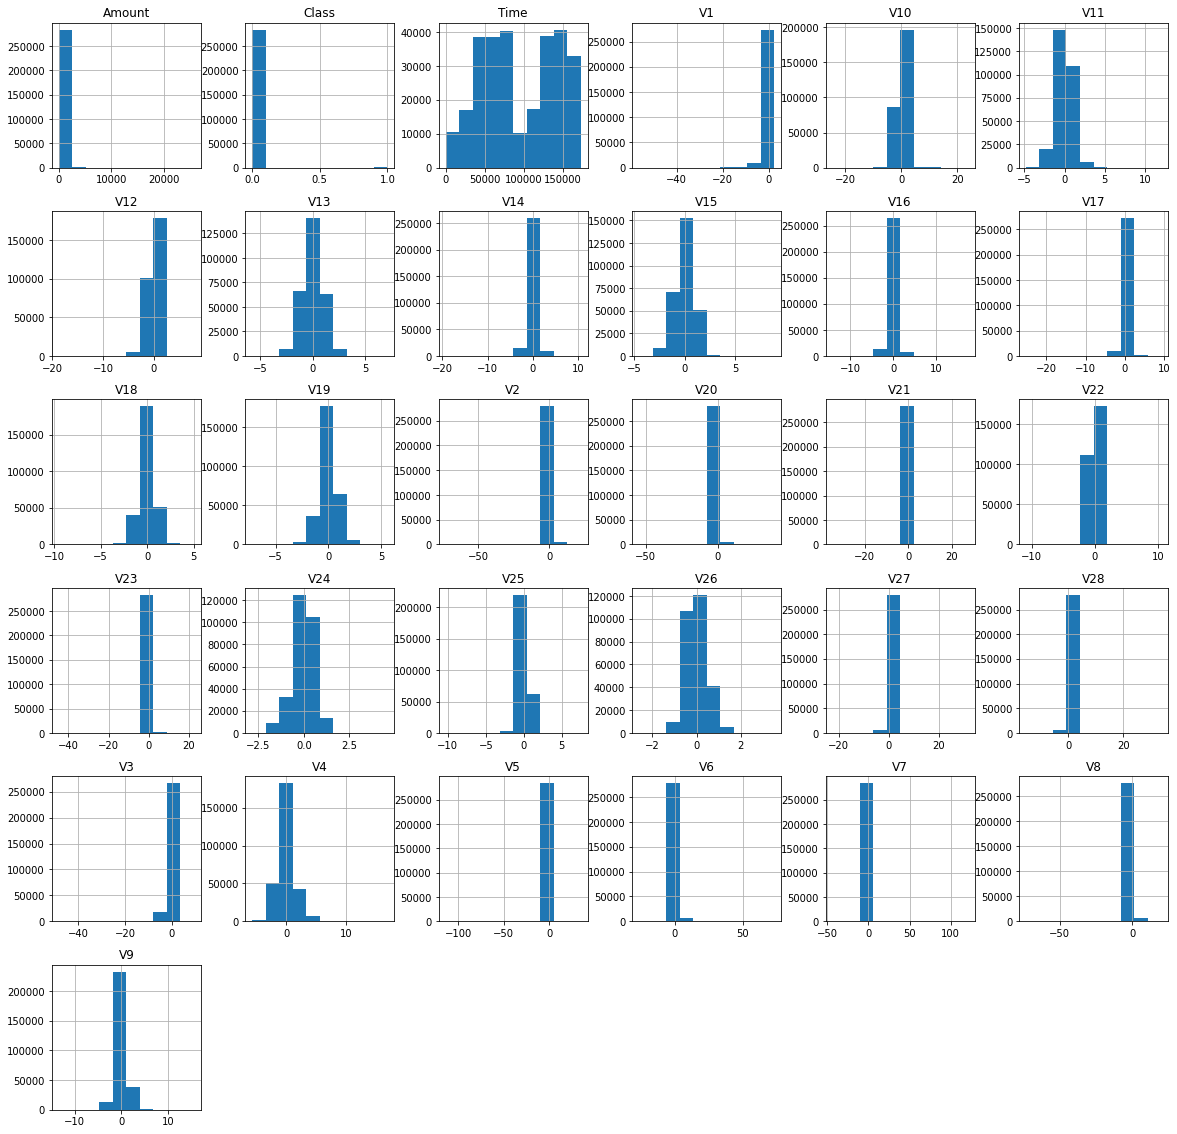

In [ ]:
# Distribution of each feature
data.hist(figsize=(20,20))
plt.show()

Determine the number of fraud and valid transactions in the dataset.

In [ ]:
# Computing the outlier fraction
outlier_fraction = len(Fraud)/float(len(Normal))

Now let us print the outlier fraction and no of Fraud and Valid Transaction cases 

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Normal)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


Correlation Matrix

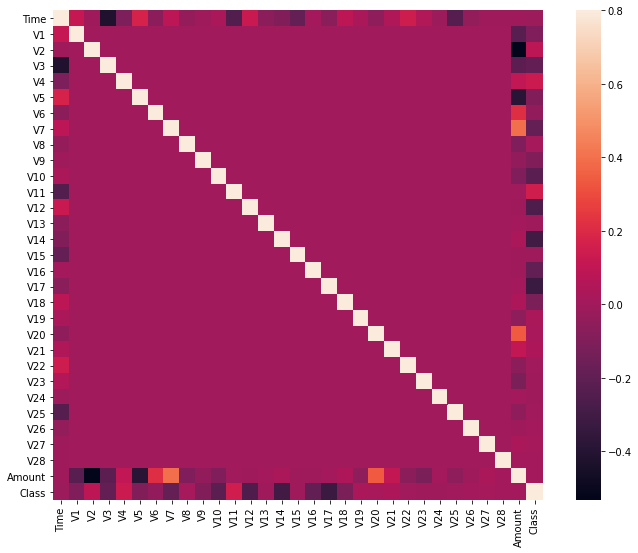

In [ ]:
# Looking at the correlation across features
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [ ]:
# Standardizing Time and Amount columns
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
# Subsetting the data for experiments
# data_backup = data
# data = data.sample(frac = 0.1,random_state=1)

In [ ]:
# Preparing data for modelling
def prep_data(df):
    '''
    Definition: Function to split the data into train and test

    Input:
      - df - input DataFrame
    
    Output:
      - X_train - training input
      - X_test - testing input
      - y_train - train label
      - y_test - test label
    '''
    
    # Dropping Time as it does not matter to fraud detection
    df = df.drop(['Time'], axis=1)

    # Creating a 75-25 train-test split
    X_train, X_test = train_test_split(df, test_size=0.25, random_state=1)

    # Filter for just the non-fraud cases
    #X_train = X_train[X_train.Class == 0]

    y_train = X_train.Class

    # Dropping the class from X_train
    X_train = X_train.drop(['Class'], axis=1)

    y_test = X_test.Class

    # Dropping the class from X_test
    X_test = X_test.drop(['Class'], axis=1)

    # Converting pandas Series to numpy array 
    X_train = X_train.values
    X_test = X_test.values
    
    return X_train, X_test, y_train, y_test

In [ ]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = prep_data(data)

In [ ]:
# Checking the count of train and test
np.unique(np.asarray(Y_test), return_counts = True)

(array([0, 1]), array([71091,   111]))

In [ ]:
from sklearn.model_selection import train_test_split
def prep_train_val_test_data(df):
    '''
    Definition: Function to split the data into train and test

    Input:
      - df - input DataFrame
    
    Output:
      - X_train - training input
      - X_test - testing input
      - Y_train - train label
      - Y_test - test label
      - X_val - validation input
      - Y_val - validation label
    '''

    # Creating a stratified split for train and test 
    X_train, X_test = train_test_split(df, test_size=0.25, stratify=df.Class, random_state=50)
    
    y_train = X_train.Class    
    y_test = X_test.Class

    # Removing labels from train data
    X_test = X_test.drop(['Class'], axis=1)
    
    # Further splitting the train into train and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=X_train.Class, random_state=50)

    # Dropping the class
    X_train = X_train.drop(['Class'], axis=1)
    X_val = X_val.drop(['Class'], axis=1)
   
    return X_train, X_val, X_test, y_train, y_val, y_test

# Generating train, test and validation splits
X_train, X_val, X_test, Y_train, Y_val, Y_test = prep_train_val_test_data(data)

"\n\n    X_train, X_test = train_test_split(df, test_size=0.25, stratify=df.Class, random_state=50)\n    \n    y_train = X_train.Class    \n    y_test = X_test.Class\n\n    X_test = X_test.drop(['Class'], axis=1)\n    \n    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=X_train.Class, random_state=50)\n\n    X_train = X_train.drop(['Class'], axis=1)\n    X_val = X_val.drop(['Class'], axis=1)\n   \n    return X_train, X_val, X_test, y_train, y_val, y_test\n\nX_train, X_val, X_test, Y_train, Y_val, Y_test = prep_train_val_test_data(data)\n"

In [ ]:
# Checking the counts
np.unique(np.asarray(Y_test), return_counts = True)

(array([0, 1]), array([71079,   123]))

## Model Prediction

In [ ]:
def write_list_to_drive(clf_name, list_name, list_content):
  output_file = final_dir+'input/Output/' + clf_name + '_' + list_name + '.txt'
  with open(output_file, 'w') as f:
    for item in list_content:
        f.write("%s\n" % item)

In [ ]:
from sklearn.metrics import roc_auc_score
def save_model(clf_name,clf):
    # save the model to disk
    model_filename = clf_name+'_model.sav'
    pickle.dump(clf, open(model_filename, 'wb'))
    return clf

In [ ]:
def model_predict(clf_name, clf, X_train, X_test, predict_on_str = 'X_test'):
    if predict_on_str == 'X_train':
        predict_on = X_train
    elif predict_on_str == 'X_val':
        predict_on = X_val
    else:
        predict_on = X_test
    
    y_proba = []
    if clf_name == 'RBM':
      predict_on = test_x
      threshold_rbm = 165
      test_cost = model.getFreeEnergy(predict_on).reshape(-1)
      y_pred = [1 if e > threshold_rbm else 0 for e in test_cost]
      #np.nan_to_num(test_cost, copy=True, nan=0.0, posinf=None, neginf=None)
      y_proba = test_cost

    elif clf_name == 'Local Outlier Factor':
      y_pred = clf.predict(predict_on)
      # scores_prediction = clf.negative_outlier_factor_
      # print(roc_auc_score(X_test,scores_prediction))
      y_pred[y_pred == 1] = 0
      y_pred[y_pred == -1] = 1
    
    elif clf_name == 'Autoencoder':
        y_pred = clf.predict(predict_on)
        print(y_pred.shape)
        threshold_fixed = 11
        if predict_on_str == 'X_train':
            y_proba = np.mean(np.power(X_train - y_pred, 2), axis=1)
        elif predict_on_str == 'X_val':
            y_proba = np.mean(np.power(X_val - y_pred, 2), axis=1)
        else:
            y_proba = np.mean(np.power(X_test - y_pred, 2), axis=1)
        print(y_proba.shape)
        y_pred = [1 if e > threshold_fixed else 0 for e in y_proba]

    elif clf_name == 'Isolation Forest':
      y_pred = clf.predict(predict_on)
      y_proba = -clf.score_samples(predict_on)
      y_pred[y_pred == 1] = 0
      y_pred[y_pred == -1] = 1
    else:
      y_pred = clf.predict(predict_on)
      MAX = max(clf.decision_function(X_train))
      y_proba = MAX - clf.decision_function(X_test)
      #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
      y_pred[y_pred == 1] = 0
      y_pred[y_pred == -1] = 1

    # Writing y_pred to drive
    write_list_to_drive(clf_name, 'y_pred', y_pred)
    write_list_to_drive(clf_name, 'y_proba', y_proba)
    
    return y_pred, y_proba

In [ ]:
from sklearn.metrics import roc_curve, auc
def build_ROC_curve(fpr,tpr,model_name):
    #from sklearn.metrics import roc_auc_score as auc
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = str(model_name) + ' | AUC = %0.3f'% roc_auc)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='lower right')
    plt.title('Receiver operating Characteristic Curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
def model_evaluate(clf_name, y_pred, y_proba, Y_train, Y_test, evaluate_on_str = 'Y_test'):
    if evaluate_on_str == 'Y_train':
        evaluate_on = Y_train
    elif evaluate_on_str == 'Y_val':
        evaluate_on = Y_val
    else:
        evaluate_on = Y_test
    if clf_name == 'Clustering Based Local Outlier Factor' or clf_name == 'Nearest Neighbour Based Local Outlier Factor':
        print(np.unique(y_pred))
        n_errors = (y_pred != Y_train).sum()
        # Run Classification Metrics
        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(Y_train,y_pred))
        print("Classification Report :")
        print(classification_report(Y_train,y_pred))
    elif clf_name == 'Autoencoder' or clf_name == 'Support Vector Machine':
        print(np.unique(y_pred))
        n_errors = (y_pred != evaluate_on).sum()
        # Run Classification Metrics
        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(evaluate_on,y_pred))
        print("Classification Report :")
        print(classification_report(evaluate_on,y_pred))
            
        print("Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 1, average = 'binary', beta = 2))

        print("Non-Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 0, average = 'binary', beta = 2))
        
    elif clf_name == 'Isolation Forest':
        print(np.unique(y_pred))
        n_errors = (y_pred != evaluate_on).sum()
        # Run Classification Metrics
        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(evaluate_on,y_pred))
        print("Classification Report :")
        print(classification_report(evaluate_on,y_pred))
            
        print("Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 1, average = 'binary', beta = 2))

        print("Non-Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 0, average = 'binary', beta = 2))
        
    elif clf_name == 'RBM':
        print(np.unique(y_pred))
        n_errors = (y_pred != evaluate_on).sum()
        # Run Classification Metrics
        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(evaluate_on,y_pred))
        print("Classification Report :")
        print(classification_report(evaluate_on,y_pred))
        print("AUC :")
        from sklearn.metrics import roc_auc_score as auc
        print(auc(evaluate_on, y_proba))
            
        print("Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 1, average = 'binary', beta = 2))

        print("Non-Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 0, average = 'binary', beta = 2))       

    else:
        print(np.unique(y_pred))
        n_errors = (y_pred != evaluate_on).sum()
        # Run Classification Metrics
        print("{}: {}".format(clf_name,n_errors))
        print("Accuracy Score :")
        print(accuracy_score(evaluate_on,y_pred))
        print("Classification Report :")
        print(classification_report(evaluate_on,y_pred))
            
        print("Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 1, average = 'binary', beta = 2))

        print("Non-Fraud Fbeta Score: ")
        print(fbeta_score(evaluate_on,y_pred, pos_label = 0, average = 'binary', beta = 2))
        

    conf_matrix = confusion_matrix(evaluate_on, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

#### 1. Isolation Forest Algorithm
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.



Define the outlier detection methods

In [ ]:
def build_IsolationForest(X_train):

    '''
    Definition: Function to build the Isolation Forest model
    Input: Training data
    Output: Returns the model

    Model Parameters (specified inside the function):
    n_estimators: The number of base estimators in the ensemble
    max_samples: The number of samples to draw from X to train each base estimator
    contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data set
    verbose: Controls the verbosity of the tree building process
    random_state: Controls the pseudo-randomness of the selection of the feature and split values for each branching step and each tree in the forest
    '''

    model_name = "Isolation Forest"
    build_model = True
    if build_model:
        clf = IsolationForest(n_estimators = 100, max_samples=len(X_train), 
                                         contamination=outlier_fraction, verbose=0, random_state = 1)
        clf.fit(X_train)

        if_model = save_model(model_name, clf)
    else:
        # load the model from disk
        if_model = pickle.load(open(model_name+'_model.sav', 'rb'))
    
    return if_model

In [ ]:
# Get the trained model
model = build_IsolationForest(X_train)
# Get predicted y and y probability for test dataset
y_pred, y_proba = model_predict("Isolation Forest", model, X_train, X_test, 'X_test')

[0 1]
Isolation Forest: 146
Accuracy Score :
0.9979494958006797
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.40      0.36      0.38       123

    accuracy                           1.00     71202
   macro avg       0.70      0.68      0.69     71202
weighted avg       1.00      1.00      1.00     71202

Fraud Fbeta Score: 
0.3648424543946932
Non-Fraud Fbeta Score: 
0.9990236545706754


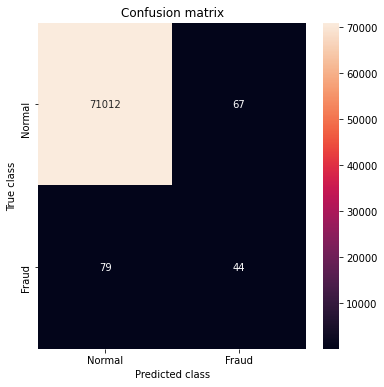

In [ ]:
# Evaluate isolation Forest model
model_evaluate('Isolation Forest', y_pred, y_proba, Y_train, Y_test, 'Y_test')

#### 2. Nearest Neighbour Based Local Outlier Factor(LOF) Algorithm

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.


Fit the model

In [ ]:
# def build_ClusteringLocalOutlierFactor(X_train):
# '''
#     Definition: Function to build the Nearest Neighbor Based Local Outlier Factor(LOF) Algorithm
#     Input: Training data
#     Output: Returns the trained model

#     Model Parameters (specified inside the function):
#     n_neighbors: The number of neighbors to use 
#     contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data   
#     '''

#     model_name = "Local Outlier Factor"
#     build_model = True
#     if build_model:

#         clf = LocalOutlierFactor(n_neighbors=30, contamination=outlier_fraction)
#         clf.fit(X_train)

#         clustering_model = save_model(model_name, clf)
#     else:
#         # load the model from disk
#         if_model = pickle.load(open(model_name+'_model.sav', 'rb'))
    
#     return if_model

In [ ]:
# model = build_LocalOutlierFactor(X_train)
# y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_test, 'X_test')
#y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_train, 'X_train')
#y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_val, 'X_val')

#### 3. Clustering Based Local Outlier Factor
<p> The process of arranging similar objects into groups is referred to as clustering. Clustering based anomaly detection techniques operate on the output
of clustering algorithms, e.g. the well-known k-means algorithm. They assume
that anomalous instances either lie in sparse and small clusters, far from their
cluster centroid or that they are not assigned to any cluster at all. </p>

In [ ]:
# def build_ClusteringLocalOutlierFactor(X_train):
# '''
#     Definition: Function to build the Clustering Based Local Outlier Factor(LOF) Algorithm
#     Input: Training data
#     Output: Returns the trained model
#     Model Parameters (specified inside the function):
#     n_clusters: The number of clusters to form as well as the number of centroids to generate
#     contamination: The amount of contamination of the data set, i.e. the proportion of outliers in the data 
#     alpha, beta: Coefficient for deciding small and large clusters. The ratio of the number of samples in large clusters to the number of samples in small clusters
# '''
#     model_name = "Local Outlier Factor"
#     build_model = True
#     if build_model:
#         clf = CBLOF(n_clusters=10, contamination=outlier_fraction, alpha=0.6, beta=10)

#         clf.fit(X_train)

#         lof_model = save_model(model_name, clf)
#     else:
#         # load the model from disk
#         lof_model = pickle.load(open(model_name+'_model.sav', 'rb'))

#     return lof_model

In [ ]:
# model = build_ClusteringLocalOutlierFactor(X_train)
# y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_test, 'X_test')
#y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_train, 'X_train')
#y_pred, y_proba = model_predict("Local Outlier Factor", model, X_train, X_val, 'X_val')

#### 4. One Class Support Vector Machine (SVM)

<p> One-class SVM applies a One-class classification method for novelty detection. This method is best suited for novelty detection when the training set is not contaminated by outliers. That said, outlier detection in high-dimension, or without any assumptions on the distribution of the inlying data is very challenging, and a One-class SVM might give useful results in these situations depending on the value of its hyperparameters. </p>


<p> Th learning algorithm is trained on normal data in our cases normal transactions. It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as outliers. The nu parameter should be the proportion of outliers you expect to observe(0.05). The gamma parameter determines the smoothing of the contour lines. We can tune the gamma parameter </p>

In [ ]:
def build_OneClassSVM(X_train):

'''
    Definition: Function to build the One Class SVM algorithm
    Input: Training data
    Output: Returns the trained model

    Model Parameters (specified inside the function):

    Kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
    Gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    Nu: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
    Max_iter: Hard limit on iterations within solver, or -1 for no limit
    Tol: Tolerance for stopping criterion
    '''

    model_name = "Support Vector Machine"
    build_model = True
    if build_model:
        clf = OneClassSVM(kernel='rbf', gamma = 'scale', nu=outlier_fraction, 
                                             max_iter=-1, tol = 0.001)

        clf.fit(X_train)
        
        svm_model = save_model(model_name, clf)
    else:
      # load the model from disk
        svm_model = pickle.load(open(model_name+'_model.sav', 'rb'))
    
    return svm_model

In [ ]:
model = build_OneClassSVM(X_train)
y_pred, y_proba = model_predict("Support Vector Machine", model, X_train, X_test, 'X_test')

### 5. Autoencoders (One-Class)

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.

An autoencoder learns to compress data from the input layer into a short code, and then uncompress that code into something that closely matches the original data. This forces the autoencoder to engage in dimensionality reduction, for example by learning how to ignore noise. Some architectures use stacked sparse autoencoder layers for image recognition. The first autoencoder might learn to encode easy features like corners, the second to analyze the first layer's output and then encode less local features like the tip of a nose, the third might encode a whole nose, etc., until the final autoencoder encodes the whole image into a code that matches (for example) the concept of "cat".An alternative use is as a generative model: for example, if a system is manually fed the codes it has learned for "cat" and "flying", it may attempt to generate an image of a flying cat, even if it has never seen a flying cat before.

The simplest form of an autoencoder is a feedforward, non-recurrent neural network very similar to the many single layer perceptrons which makes a multilayer perceptron (MLP) – having an input layer, an output layer and one or more hidden layers connecting them – but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs (instead of predicting the target value Y  given inputs X). Therefore, autoencoders are unsupervised learning models. 


In [ ]:
#set up graphic style in this case I am using the color scheme from xkcd.com
# rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
# LABELS = ["Normal","Fraud"]
# col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

In [ ]:
def build_Autoencoder(X_train):
    model_name = 'Autoencoder'
    nb_epoch = 50
    batch_size = 256
    input_dim = X_train.shape[1] #num of columns, 29
    encoding_dim = 28
    hidden_dim = 24
    #hidden_dim = int(encoding_dim / 2) #i.e. 8
    learning_rate = 1e-6

    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(hidden_dim, activation="relu")(encoder)
    decoder = Dense(hidden_dim, activation='tanh')(encoder)
    decoder = Dense(input_dim, activation='relu')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

    cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                                   save_best_only=True,
                                   verbose=0)

    tb = TensorBoard(log_dir='/logs/',
                    histogram_freq=0,
                    write_graph=True,
                    write_images=True,
                    profile_batch = 100000000)

    history = autoencoder.fit(X_train, X_train,
                        epochs=nb_epoch,
                        batch_size=batch_size,
                        shuffle=True,
#                         validation_data=(X_test, X_test),
                        verbose=0,
                        callbacks=[cp, tb]).history
    return autoencoder

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 29kB/s 
     |████████████████████████████████| 460kB 48.1MB/s 
     |████████████████████████████████| 3.0MB 41.5MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [ ]:
model = build_Autoencoder(X_train)
y_pred, y_proba = model_predict('Autoencoder', model, X_train, X_test, 'X_test')
#y_pred, y_proba = model_predict('Autoencoder', model, X_train, X_train, 'X_train')
#y_pred, y_proba = model_predict('Autoencoder', model, X_train, X_val, 'X_val')

(71202, 30)
(71202,)


[0 1]
Autoencoder: 295
Accuracy Score :
0.9958568579534283
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.20      0.46      0.28       123

    accuracy                           1.00     71202
   macro avg       0.60      0.73      0.64     71202
weighted avg       1.00      1.00      1.00     71202

Fraud Fbeta Score: 
0.36082474226804123
Non-Fraud Fbeta Score: 
0.997244070105902


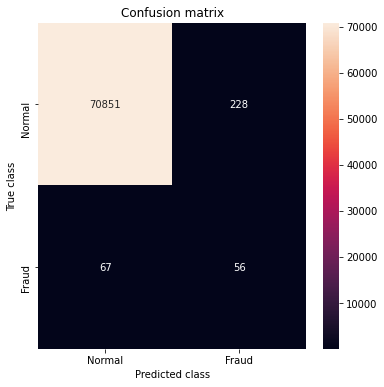

In [ ]:
model_evaluate('Autoencoder', y_pred, y_proba, Y_train, Y_test, 'Y_test')

In [ ]:
# model_name = 'Autoencoder'
# nb_epoch = 50
# batch_size = 256
# input_dim = X_train.shape[1] #num of columns, 30
# encoding_dim = 28
# hidden_dim = 24
# #hidden_dim = int(encoding_dim / 2) #i.e. 8
# learning_rate = 1e-6

# input_layer = Input(shape=(input_dim, ))
# encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
# encoder = Dense(hidden_dim, activation="relu")(encoder)
# decoder = Dense(hidden_dim, activation='tanh')(encoder)
# decoder = Dense(input_dim, activation='relu')(decoder)
# autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
# autoencoder.compile(metrics=['accuracy'],
#                     loss='mean_squared_error',
#                     optimizer='adam')

# cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                save_best_only=True,
#                                verbose=0)

# tb = TensorBoard(log_dir='/logs/',
#                 histogram_freq=0,
#                 write_graph=True,
#                 write_images=True,
#                 profile_batch = 100000000)

# history = autoencoder.fit(X_train, X_train,
#                     epochs=nb_epoch,
#                     batch_size=batch_size,
#                     shuffle=True,
#                     validation_data=(X_test, X_test),
#                     verbose=1,
#                     callbacks=[cp, tb]).history

Train on 213605 samples, validate on 71202 samples
Epoch 1/50
213605/213605 [==============================] - 2s 11us/step - loss: 0.8014 - accuracy: 0.6067 - val_loss: 0.6849 - val_accuracy: 0.7936
Epoch 2/50
213605/213605 [==============================] - 2s 10us/step - loss: 0.6690 - accuracy: 0.8441 - val_loss: 0.6371 - val_accuracy: 0.8758
Epoch 3/50
213605/213605 [==============================] - 2s 10us/step - loss: 0.6417 - accuracy: 0.8866 - val_loss: 0.6222 - val_accuracy: 0.8998
Epoch 4/50
213605/213605 [==============================] - 2s 11us/step - loss: 0.6311 - accuracy: 0.9055 - val_loss: 0.6148 - val_accuracy: 0.9098
Epoch 5/50
213605/213605 [==============================] - 2s 10us/step - loss: 0.6256 - accuracy: 0.9139 - val_loss: 0.6101 - val_accuracy: 0.9224
Epoch 6/50
213605/213605 [==============================] - 2s 10us/step - loss: 0.6227 - accuracy: 0.9184 - val_loss: 0.6087 - val_accuracy: 0.9136
Epoch 7/50
213605/213605 [=============================

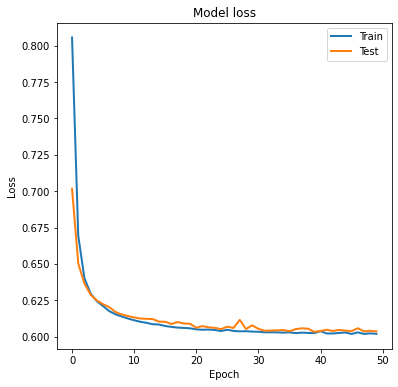

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
autoencoder.save('autoencoder_fraud.h5')

[0 1]
Autoencoder: 240
Accuracy Score :
0.996629308165501
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.16      0.26      0.19       111

    accuracy                           1.00     71202
   macro avg       0.58      0.63      0.60     71202
weighted avg       1.00      1.00      1.00     71202

Fraud Fbeta Score: 
0.2297939778129952
Non-Fraud Fbeta Score: 
0.9979908773450316


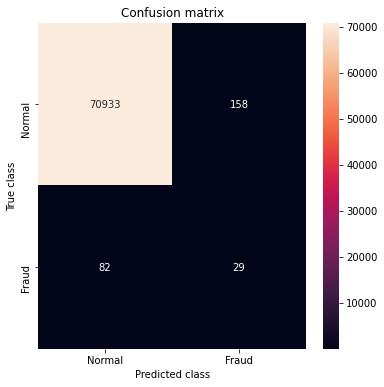

In [ ]:
y_pred, y_proba = model_predict(model_name, autoencoder, X_train, X_test)
model_evaluate(model_name,y_pred,y_proba,Y_train, Y_test)

### 6. Restricted Boltzmann Machine (RBM)

Boltzmann machines are stochastic and generative neural networks capable of learning internal representations and are able to represent and (given sufficient time) solve difficult combinatoric problems.
They are named after the Boltzmann distribution (also known as Gibbs Distribution) which is an integral part of Statistical Mechanics and helps us to understand the impact of parameters like Entropy and Temperature on the Quantum States in Thermodynamics. That’s why they are called Energy-Based Models (EBM).


#### RMB Class Implementation

#### Caveats regarding RBM Implementation
RBM implementation has been leveraged from this [article](https://weiminwang.blog/2017/08/05/credit-card-fraud-detection-2-using-restricted-boltzmann-machine-in-tensorflow/). The code being used accompanies this article and was cloned from this [github repository](https://github.com/aaxwaz/Fraud-detection-using-deep-learning/tree/master/rbm). RBM implementation has some caveats as mentioned below:
- RBM model requires standardization of data to be able to compute reconstruction error properly.
When standardization is not used the model was found to give infinite reconstruction error values
- RBM runs only on Tensorflow 1.15. Does NOT work on the latest versions (Note: Autoencoder runs only on latest tensorflow versions - 2.2)

In [ ]:
# Standardization for train and test
'''
# Standardizing the dataset
train_x = X_train
test_x = X_test
train_y = Y_train
test_y = Y_test

# Preprocessing z-scores
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
'''

'\n# Standardizing the dataset\ntrain_x = X_train\ntest_x = X_test\ntrain_y = Y_train\ntest_y = Y_test\n\n# Preprocessing z-scores\ncols_mean = []\ncols_std = []\nfor c in range(train_x.shape[1]):\n    cols_mean.append(train_x[:,c].mean())\n    cols_std.append(train_x[:,c].std())\n    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]\n    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]\n'

In [ ]:
# In case validation data is also present, use standardization for train, val and test below

# Standardizing the dataset
train_x = X_train.values
test_x = X_test.values
train_y = Y_train.values
test_y = Y_test.values
val_x = X_val.values
val_y = Y_val.values

# Preprocessing z-scores
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
    val_x[:, c] =  (val_x[:, c] - cols_mean[-1]) / cols_std[-1]

The functions below have been cloned from the github repo mentioned above. They can be put in a separate file and imported while productionalization

In [ ]:
# Functions for RBM implementation
from scipy import misc
import tensorflow as tf
import numpy as np


def sample_prob(probs, rand):
    """ Takes a tensor of probabilities (as from a sigmoidal activation)
    and samples from all the distributions
    :param probs: tensor of probabilities
    :param rand: tensor (of the same shape as probs) of random values
    :return : binary sample of probabilities
    """
    return tf.nn.relu(tf.sign(probs - rand))

def gen_batches(data, batch_size):
    """ Divide input data into batches.
    :param data: input data
    :param batch_size: size of each batch
    :return: data divided into batches
    """
    data = np.array(data)

    for i in range(0, data.shape[0], batch_size):
        yield data[i:i+batch_size]

def gen_image(img, width, height, outfile, img_type='grey'):
    assert len(img) == width * height or len(img) == width * height * 3

    if img_type == 'grey':
        misc.imsave(outfile, img.reshape(width, height))

    elif img_type == 'color':
        misc.imsave(outfile, img.reshape(3, width, height))
        

# Functions and class for RBM implementation
#from rbm import RBM
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

#import utils

class RBM(object):

    """ Restricted Boltzmann Machine implementation using TensorFlow.
    The interface of the class is sklearn-like.
    """

    def __init__(self, num_visible, num_hidden, visible_unit_type='bin', main_dir='/home/weimin/rbm/model', model_name='rbm_model',
                 gibbs_sampling_steps=1, learning_rate=0.01, momentum = 0.9, l2 = 0.001, batch_size=10, num_epochs=10, stddev=0.1, verbose=0, plot_training_loss=True):

        """
        :param num_visible: number of visible units
        :param num_hidden: number of hidden units
        :param visible_unit_type: type of the visible units (binary or gaussian)
        :param main_dir: main directory to put the models, data and summary directories
        :param model_name: name of the model, used to save data
        :param gibbs_sampling_steps: optional, default 1
        :param learning_rate: optional, default 0.01
        :param momentum: momentum for gradient descent, default 0.9
        :param l2: l2 weight decay, default 0.001
        :param batch_size: optional, default 10
        :param num_epochs: optional, default 10
        :param stddev: optional, default 0.1. Ignored if visible_unit_type is not 'gauss'
        :param verbose: level of verbosity. optional, default 0
        :param plot_training_loss: whether or not to plot training loss, default True
        """

        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.visible_unit_type = visible_unit_type
        self.main_dir = main_dir
        self.model_name = model_name
        self.gibbs_sampling_steps = gibbs_sampling_steps
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.l2 = l2
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.stddev = stddev
        self.verbose = verbose

        self._create_model_directory()
        self.model_path = os.path.join(self.main_dir, self.model_name)
        self.plot_training_loss = plot_training_loss

        self.W = None
        self.bh_ = None
        self.bv_ = None
        self.dw = None
        self.dbh_ = None 
        self.dbv_ = None

        self.w_upd8 = None
        self.bh_upd8 = None
        self.bv_upd8 = None

        self.encode = None
        self.recontruct = None

        self.loss_function = None
        self.batch_cost = None
        self.batch_free_energy = None

        self.training_losses = []

        self.input_data = None
        self.hrand = None
        self.validation_size = None

        self.tf_session = None
        self.tf_saver = None

    def fit(self, train_set, validation_set=None, restore_previous_model=False):

        """ Fit the model to the training data.
        :param train_set: training set
        :param validation_set: validation set. optional, default None
        :param restore_previous_model:
                    if true, a previous trained model
                    with the same name of this model is restored from disk to continue training.
        :return: self
        """

        if validation_set is not None:
            self.validation_size = validation_set.shape[0]

        # tf.reset_default_graph()
        ops.reset_default_graph()

        self._build_model()

        with tf.Session() as self.tf_session:

            self._initialize_tf_utilities_and_ops(restore_previous_model)
            self._train_model(train_set, validation_set)
            self.tf_saver.save(self.tf_session, self.model_path)

            if self.plot_training_loss:
                plt.plot(self.training_losses)
                plt.title("Training batch losses v.s. iteractions")
                plt.xlabel("Num of training iteractions")
                plt.ylabel("Reconstruction error")
                plt.show()

    def _initialize_tf_utilities_and_ops(self, restore_previous_model):

        """ Initialize TensorFlow operations: summaries, init operations, saver, summary_writer.
        Restore a previously trained model if the flag restore_previous_model is true.
        """

        init_op = tf.global_variables_initializer()
        self.tf_saver = tf.train.Saver()

        self.tf_session.run(init_op)

        if restore_previous_model:
            self.tf_saver.restore(self.tf_session, self.model_path)

    def _train_model(self, train_set, validation_set):

        """ Train the model.
        :param train_set: training set
        :param validation_set: validation set. optional, default None
        :return: self
        """

        for i in range(self.num_epochs):
            self._run_train_step(train_set)

            if validation_set is not None:
                self._run_validation_error(i, validation_set)

    def _run_train_step(self, train_set):

        """ Run a training step. A training step is made by randomly shuffling the training set,
        divide into batches and run the variable update nodes for each batch. If self.plot_training_loss 
        is true, will record training loss after each batch. 
        :param train_set: training set
        :return: self
        """

        np.random.shuffle(train_set)

        #batches = [_ for _ in utils.gen_batches(train_set, self.batch_size)]
        batches = [_ for _ in gen_batches(train_set, self.batch_size)]
        updates = [self.w_upd8, self.bh_upd8, self.bv_upd8]


        for batch in batches:
            if self.plot_training_loss:
                _, loss = self.tf_session.run([updates, self.loss_function], feed_dict=self._create_feed_dict(batch))
                self.training_losses.append(loss)
            else:
                self.tf_session.run(updates, feed_dict=self._create_feed_dict(batch))

    def _run_validation_error(self, epoch, validation_set):

        """ Run the error computation on the validation set and print it out for each epoch. 
        :param epoch: current epoch
        :param validation_set: validation data
        :return: self
        """

        loss = self.tf_session.run(self.loss_function,
                                   feed_dict=self._create_feed_dict(validation_set))

        if self.verbose == 1:
            print("Validation cost at step %s: %s" % (epoch, loss))

    def _create_feed_dict(self, data):

        """ Create the dictionary of data to feed to TensorFlow's session during training.
        :param data: training/validation set batch
        :return: dictionary(self.input_data: data, self.hrand: random_uniform)
        """

        return {
            self.input_data: data,
            self.hrand: np.random.rand(data.shape[0], self.num_hidden),
        }

    def _build_model(self):

        """ Build the Restricted Boltzmann Machine model in TensorFlow.
        :return: self
        """

        self.input_data, self.hrand = self._create_placeholders()
        self.W, self.bh_, self.bv_, self.dw, self.dbh_, self.dbv_ = self._create_variables()

        hprobs0, hstates0, vprobs, hprobs1, hstates1 = self.gibbs_sampling_step(self.input_data)
        positive = self.compute_positive_association(self.input_data, hprobs0, hstates0)

        nn_input = vprobs

        for step in range(self.gibbs_sampling_steps - 1):
            hprobs, hstates, vprobs, hprobs1, hstates1 = self.gibbs_sampling_step(nn_input)
            nn_input = vprobs

        self.recontruct = vprobs

        negative = tf.matmul(tf.transpose(vprobs), hprobs1)

        self.encode = hprobs1  # encoded data, used by the transform method

        dw = positive - negative
        self.dw = self.momentum*self.dw + (1-self.momentum)*dw
        self.w_upd8 = self.W.assign_add(self.learning_rate*self.dw - self.learning_rate*self.l2*self.W)

        dbh_ = tf.reduce_mean(hprobs0 - hprobs1, 0)
        self.dbh_ = self.momentum*self.dbh_ + self.learning_rate*dbh_
        self.bh_upd8 = self.bh_.assign_add(self.dbh_)

        dbv_ = tf.reduce_mean(self.input_data - vprobs, 0)
        self.dbv_ = self.momentum*self.dbv_ + self.learning_rate*dbv_
        self.bv_upd8 = self.bv_.assign_add(self.dbv_)

        """ method 2 for updating with momentum
        def _update_with_momentum(x_old, x_new):
            return self.momentum * x_old +\
                   self.learning_rate * x_new * (1 - self.momentum) 

        dw = positive - negative
        self.dw = _update_with_momentum(self.dw, dw)
        self.w_upd8 = self.W.assign_add(self.dw)

        dbh_ = tf.reduce_mean(hprobs0 - hprobs1, 0)
        self.dbh_ = _update_with_momentum(self.dbh_, dbh_)
        self.bh_upd8 = self.bh_.assign_add(self.dbh_)

        dbv_ = tf.reduce_mean(self.input_data - vprobs, 0)
        self.dbv_ = _update_with_momentum(self.dbv_, dbv_)
        self.bv_upd8 = self.bv_.assign_add(self.dbv_)"""

        self.loss_function = tf.sqrt(tf.reduce_mean(tf.square(self.input_data - vprobs)))

        self.batch_cost = tf.sqrt(tf.reduce_mean(tf.square(self.input_data - vprobs), 1))
   
        self._create_free_energy_for_batch()
        
    def _create_free_energy_for_batch(self):

        """ Create free energy ops to batch input data 
        :return: self
        """

        if self.visible_unit_type == 'bin':
            self._create_free_energy_for_bin()    
        elif self.visible_unit_type == 'gauss':
            self._create_free_energy_for_gauss()
        else:
            self.batch_free_energy = None

    def _create_free_energy_for_bin(self):

        """ Create free energy for mdoel with Bin visible layer
        :return: self
        """

        self.batch_free_energy = - (tf.matmul(self.input_data, tf.reshape(self.bv_, [-1, 1])) + \
                                    tf.reshape(tf.reduce_sum(tf.log(tf.exp(tf.matmul(self.input_data, self.W) + self.bh_) + 1), 1), [-1, 1]))

    def _create_free_energy_for_gauss(self):

        """ Create free energy for model with Gauss visible layer 
        :return: self
        """

        self.batch_free_energy = - (tf.matmul(self.input_data, tf.reshape(self.bv_, [-1, 1])) - \
                                    tf.reshape(tf.reduce_sum(0.5 * self.input_data * self.input_data, 1), [-1, 1]) + \
                                    tf.reshape(tf.reduce_sum(tf.log(tf.exp(tf.matmul(self.input_data, self.W) + self.bh_) + 1), 1), [-1, 1]))

    def _create_placeholders(self):

        """ Create the TensorFlow placeholders for the model.
        :return: tuple(input(shape(None, num_visible)), 
                       hrand(shape(None, num_hidden)))
        """

        x = tf.placeholder('float', [None, self.num_visible], name='x-input')
        hrand = tf.placeholder('float', [None, self.num_hidden], name='hrand')

        return x, hrand

    def _create_variables(self):

        """ Create the TensorFlow variables for the model.
        :return: tuple(weights(shape(num_visible, num_hidden),
                       hidden bias(shape(num_hidden)),
                       visible bias(shape(num_visible)))
        """

        W = tf.Variable(tf.random_normal((self.num_visible, self.num_hidden), mean=0.0, stddev=0.01), name='weights')
        dw = tf.Variable(tf.zeros([self.num_visible, self.num_hidden]), name = 'derivative-weights')

        bh_ = tf.Variable(tf.zeros([self.num_hidden]), name='hidden-bias')
        dbh_ = tf.Variable(tf.zeros([self.num_hidden]), name='derivative-hidden-bias')

        bv_ = tf.Variable(tf.zeros([self.num_visible]), name='visible-bias')
        dbv_ = tf.Variable(tf.zeros([self.num_visible]), name='derivative-visible-bias')

        return W, bh_, bv_, dw, dbh_, dbv_

    def gibbs_sampling_step(self, visible):

        """ Performs one step of gibbs sampling.
        :param visible: activations of the visible units
        :return: tuple(hidden probs, hidden states, visible probs,
                       new hidden probs, new hidden states)
        """

        hprobs, hstates = self.sample_hidden_from_visible(visible)
        vprobs = self.sample_visible_from_hidden(hprobs)
        hprobs1, hstates1 = self.sample_hidden_from_visible(vprobs)

        return hprobs, hstates, vprobs, hprobs1, hstates1

    def sample_hidden_from_visible(self, visible):

        """ Sample the hidden units from the visible units.
        This is the Positive phase of the Contrastive Divergence algorithm.
        :param visible: activations of the visible units
        :return: tuple(hidden probabilities, hidden binary states)
        """

        hprobs = tf.nn.sigmoid(tf.matmul(visible, self.W) + self.bh_)
        #hstates = utils.sample_prob(hprobs, self.hrand)
        hstates = sample_prob(hprobs, self.hrand)

        return hprobs, hstates

    def sample_visible_from_hidden(self, hidden):

        """ Sample the visible units from the hidden units.
        This is the Negative phase of the Contrastive Divergence algorithm.
        :param hidden: activations of the hidden units
        :return: visible probabilities
        """

        visible_activation = tf.matmul(hidden, tf.transpose(self.W)) + self.bv_

        if self.visible_unit_type == 'bin':
            vprobs = tf.nn.sigmoid(visible_activation)

        elif self.visible_unit_type == 'gauss':
            vprobs = tf.truncated_normal((1, self.num_visible), mean=visible_activation, stddev=self.stddev)
        else:
            vprobs = None

        return vprobs

    def compute_positive_association(self, visible, hidden_probs, hidden_states):

        """ Compute positive associations between visible and hidden units.
        :param visible: visible units
        :param hidden_probs: hidden units probabilities
        :param hidden_states: hidden units states
        :return: positive association = dot(visible.T, hidden)
        """

        if self.visible_unit_type == 'bin':
            positive = tf.matmul(tf.transpose(visible), hidden_states)

        elif self.visible_unit_type == 'gauss':
            positive = tf.matmul(tf.transpose(visible), hidden_probs)

        else:
            positive = None

        return positive

    def _create_model_directory(self):

        """ Create the directory for storing the model
        :return: self
        """

        if not os.path.isdir(self.main_dir):
            print("Created dir: ", self.main_dir)
            os.mkdir(self.main_dir)

    def getRecontructError(self, data):

        """ return Reconstruction Error (loss) from data in batch.
        :param data: input data of shape num_samples x visible_size
        :return: Reconstruction cost for each sample in the batch
        """

        with tf.Session() as self.tf_session:

            self.tf_saver.restore(self.tf_session, self.model_path)

            batch_loss = self.tf_session.run(self.batch_cost,
                                             feed_dict=self._create_feed_dict(data))
            return batch_loss

    def getFreeEnergy(self, data):

        """ return Free Energy from data.
        :param data: input data of shape num_samples x visible_size
        :return: Free Energy for each sample: p(x)
        """

        with tf.Session() as self.tf_session:

            self.tf_saver.restore(self.tf_session, self.model_path)

            batch_FE = self.tf_session.run(self.batch_free_energy,
                                           feed_dict=self._create_feed_dict(data))

            return batch_FE

    def getRecontruction(self, data):

        with tf.Session() as self.tf_session:
            
            self.tf_saver.restore(self.tf_session, self.model_path)

            batch_reconstruct = self.tf_session.run(self.recontruct, 
                                                    feed_dict=self._create_feed_dict(data))

            return batch_reconstruct

    def load_model(self, shape, gibbs_sampling_steps, model_path):

        """ Load a trained model from disk. The shape of the model
        (num_visible, num_hidden) and the number of gibbs sampling steps
        must be known in order to restore the model.
        :param shape: tuple(num_visible, num_hidden)
        :param gibbs_sampling_steps:
        :param model_path:
        :return: self
        """

        self.num_visible, self.num_hidden = shape[0], shape[1]
        self.gibbs_sampling_steps = gibbs_sampling_steps
        
        # tf.reset_default_graph()
        ops.reset_default_graph()

        self._build_model()

        init_op = tf.global_variables_initializer()
        self.tf_saver = tf.train.Saver()

        with tf.Session() as self.tf_session:

            self.tf_session.run(init_op)
            self.tf_saver.restore(self.tf_session, model_path)

    def get_model_parameters(self):

        """ Return the model parameters in the form of numpy arrays.
        :return: model parameters
        """

        with tf.Session() as self.tf_session:

            self.tf_saver.restore(self.tf_session, self.model_path)

            return {
                'W': self.W.eval(),
                'bh_': self.bh_.eval(),
                'bv_': self.bv_.eval()
            }

#### RBM Model Build

In [ ]:
# RBM runs only on Tensorflow 1.15. Does NOT work on the latest versions
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 51kB 2.1MB/s 
     |████████████████████████████████| 3.8MB 41.6MB/s 
     |████████████████████████████████| 512kB 42.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6f30bdc4e7d781ed6d7372bfbe7960b7f3f70662901007096e91d0bd42946c65
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

Validation cost at step 0: 0.9936271
Validation cost at step 1: 0.92386085
Validation cost at step 2: 0.8649417
Validation cost at step 3: 0.8586695
Validation cost at step 4: 0.8554903
Validation cost at step 5: 0.85404724
Validation cost at step 6: 0.85435575
Validation cost at step 7: 0.85487
Validation cost at step 8: 0.85307753
Validation cost at step 9: 0.85466045


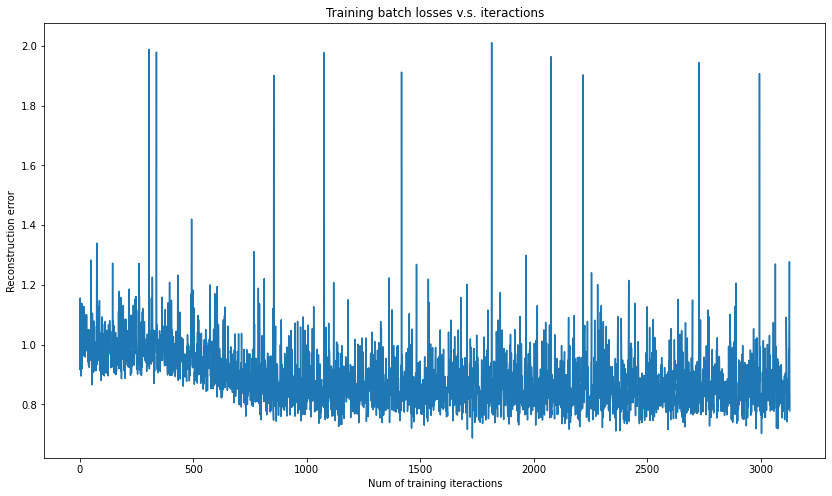

In [ ]:
# Initialize model object
main_dir = '/content/drive/My Drive/model'

"""
:param num_visible: number of visible units
:param num_hidden: number of hidden units
:param visible_unit_type: type of the visible units (binary or gaussian)
:param main_dir: main directory to put the models, data and summary directories
:param model_name: name of the model, used to save data
:param gibbs_sampling_steps: optional, default 1
:param learning_rate: optional, default 0.01
:param momentum: momentum for gradient descent, default 0.9
:param l2: l2 weight decay, default 0.001
:param batch_size: optional, default 10
:param num_epochs: optional, default 10
:param stddev: optional, default 0.1. Ignored if visible_unit_type is not 'gauss'
:param verbose: level of verbosity. optional, default 0
:param plot_training_loss: whether or not to plot training loss, default True
"""

# Initializing the RBM model. Parameters used are specified above
model = RBM(train_x.shape[1], 10, visible_unit_type='gauss', main_dir=main_dir, model_name='rbm_model.ckpt',
                 gibbs_sampling_steps=4, learning_rate=0.001, momentum = 0.95, batch_size=512, num_epochs=10, verbose=1)

# Fit the RBM model
model.fit(train_x, validation_set=test_x)

In [ ]:
# Getting the prediction and probabilities
y_pred_rbm, y_proba_rbm = model_predict('RBM', model, train_x, test_x, 'X_test')

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt


[0 1]
RBM: 371
Accuracy Score :
0.9947894722058369
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.15      0.43      0.22       123

    accuracy                           0.99     71202
   macro avg       0.57      0.71      0.61     71202
weighted avg       1.00      0.99      1.00     71202

AUC :
0.9526844458078649
Fraud Fbeta Score: 
0.3132387706855792
Non-Fraud Fbeta Score: 
0.9964129247333626


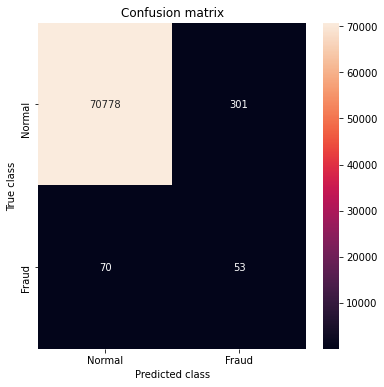

In [ ]:
# Getting model evaluation results
model_evaluate('RBM', y_pred_rbm, y_proba_rbm, train_y, test_y, 'Y_test')

## Model testing on k-folds


In [ ]:
from sklearn.model_selection import StratifiedKFold

curve_dict = {}

def do_cv_class(df, num_folds, model_name):

    '''
    Definition: Function for model testing on k-folds
    Input: 
      - df: Input dataframe
      - num_folds: Number of folds on which model is to be tested
      - model_name: Name of model 
    '''
          
    X = df.copy()
    Y = X.Class
    X = X.drop(['Class'], axis=1)
    
    Y_Pred_List = []
    Y_Train_List = []
    Y_Test_List = []
    Y_Proba_List = [] 
    foldCount = 1
    
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    #Building a loop of no of folds and running Kfold cross validation
    kf = StratifiedKFold(n_splits = num_folds, random_state = 42, shuffle=True)
    kf.get_n_splits(X)
    
    # Computing model performance on each fold
    for train_index, test_index in kf.split(X, Y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        write_list_to_drive('', 'Y_test_last_fold', Y_test)
        
        print()
        print("Fold No: " + str(foldCount))
        foldCount = foldCount + 1
        # summarize train and test composition
        
        print("------------------------------- Summary of Target Variable -------------------------------")
        
        train_0, train_1 = len(Y_train[Y_train==0]), len(Y_train[Y_train==1])
        test_0, test_1 = len(Y_test[Y_test==0]), len(Y_test[Y_test==1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

        if model_name == "Isolation Forest":
            model = build_IsolationForest(X_train)
        elif model_name == "Support Vector Machine":
            model = build_OneClassSVM(X_train)
        elif model_name == "Autoencoder":
            model = build_Autoencoder(X_train)
        elif model_name == "RBM":
            # Preprocessing z-scores
            cols_mean = []
            cols_std = []
            for c in range(X_train.shape[1]):
                cols_mean.append(X_train.iloc[:,c].mean())
                cols_std.append(X_train.iloc[:,c].std())
                X_train.iloc[:, c] = (X_train.iloc[:, c] - cols_mean[-1]) / cols_std[-1]
                X_test.iloc[:, c] =  (X_test.iloc[:, c] - cols_mean[-1]) / cols_std[-1]

            # Initialize model object with momentum
            main_dir = '/content/drive/My Drive/model'
            model = RBM(X_train.shape[1], 10, visible_unit_type='gauss', main_dir=main_dir, model_name='rbm_model.ckpt',
                    gibbs_sampling_steps=4, learning_rate=0.001, momentum = 0.95, batch_size=512, num_epochs=10, verbose=1)
            
            model.fit(X_train.values, validation_set=X_test)

        if model_name == "RBM":
            threshold_rbm = 120
            test_cost = model.getFreeEnergy(X_test).reshape(-1)
            Y_pred = [1 if e > threshold_rbm else 0 for e in test_cost]
            write_list_to_drive(model_name, 'y_pred', Y_pred)
            np.nan_to_num(test_cost, copy=True, nan=0.0, posinf=None, neginf=None)
            Y_Proba = test_cost        
        else:
            Y_pred, Y_Proba = model_predict(model_name, model, X_train, X_test)
    
        temp_fpr, temp_tpr, thresholds = roc_curve(Y_test, Y_Proba)
        
        interp_tpr = np.interp(mean_fpr, temp_fpr, temp_tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
        Y_Train_List.extend(Y_train)
        Y_Pred_List.extend(Y_pred)
        Y_Test_List.extend(Y_test)
        Y_Proba_List.extend(Y_Proba)
        print()
        print("------------------------------- Performance Evaluation For This Fold -------------------------------")
        model_evaluate(model_name,Y_pred,Y_Proba,Y_train, Y_test)
        
        print("___________________________________________________________________________________________________")
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0

    write_list_to_drive(model_name, 'mean_tpr', mean_tpr)
    write_list_to_drive(model_name, 'mean_fpr', mean_fpr)

    filename = final_dir+'input/Output/' + model_name + '_' + 'mean_tpr' + '.txt'
    mean_tpr = open(filename).read().splitlines()
    mean_tpr = np.asarray(mean_tpr)
    mean_tpr = mean_tpr.astype(float)

    filename = final_dir+'input/Output/' + model_name + '_' + 'mean_fpr' + '.txt'
    mean_fpr = open(filename).read().splitlines()
    mean_fpr = np.asarray(mean_fpr)
    mean_fpr = mean_fpr.astype(float)
    
    roc_values = [mean_fpr, mean_tpr]
    curve_dict.update({model_name : roc_values})
    
    print()
    print()
    print()
    
    print("--------------------------------------- Performance Summary of All Folds ---------------------------------------")
    model_evaluate(model_name,pd.Series(Y_Pred_List),pd.Series(Y_Proba_List),pd.Series(Y_Train_List), pd.Series(Y_Test_List))


Fold No: 1
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
Validation cost at step 0: 0.9681306
Validation cost at step 1: 0.8691471
Validation cost at step 2: 0.8605806
Validation cost at step 3: 0.8587615
Validation cost at step 4: 0.85671103
Validation cost at step 5: 0.8577714
Validation cost at step 6: 0.8554763
Validation cost at step 7: 0.8566738
Validation cost at step 8: 0.8554294
Validation cost at step 9: 0.85252845


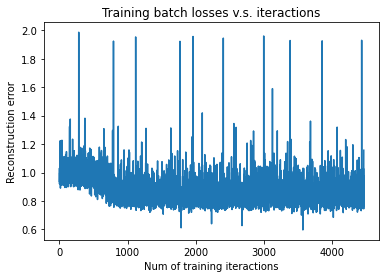

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
RBM: 425
Accuracy Score :
0.992538885572838
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.12      0.52      0.19        99

    accuracy                           0.99     56962
   macro avg       0.56      0.75      0.59     56962
weighted avg       1.00      0.99      0.99     56962

AUC :
0.9431147377615203
Fraud Fbeta Score: 
0.3094660194174758
Non-Fraud Fbeta Score: 
0.9945208566619481


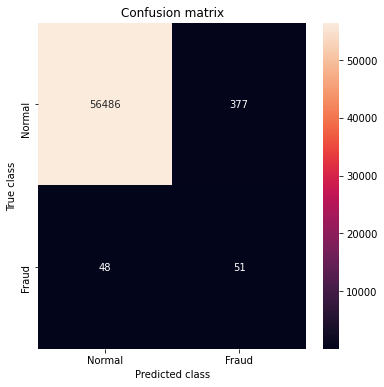

___________________________________________________________________________________________________

Fold No: 2
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
Validation cost at step 0: 0.9731804
Validation cost at step 1: 0.87267834
Validation cost at step 2: 0.86932814
Validation cost at step 3: 0.8659404
Validation cost at step 4: 0.8686827
Validation cost at step 5: 0.8656105
Validation cost at step 6: 0.86536455
Validation cost at step 7: 0.8685749
Validation cost at step 8: 0.864726
Validation cost at step 9: 0.8650838


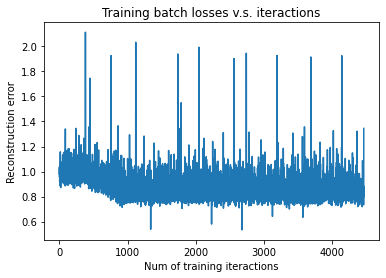

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
RBM: 439
Accuracy Score :
0.9922931076858257
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.11      0.51      0.19        99

    accuracy                           0.99     56962
   macro avg       0.56      0.75      0.59     56962
weighted avg       1.00      0.99      0.99     56962

AUC :
0.9623634654762101
Fraud Fbeta Score: 
0.29904306220095694
Non-Fraud Fbeta Score: 
0.9943339883228748


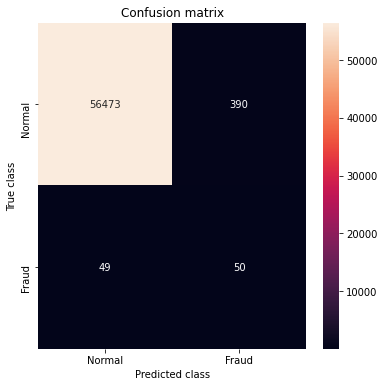

___________________________________________________________________________________________________

Fold No: 3
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
Validation cost at step 0: 0.9798231
Validation cost at step 1: 0.88349843
Validation cost at step 2: 0.87478065
Validation cost at step 3: 0.8747673
Validation cost at step 4: 0.8715366
Validation cost at step 5: 0.87648046
Validation cost at step 6: 0.8712212
Validation cost at step 7: 0.8697341
Validation cost at step 8: 0.86901236
Validation cost at step 9: 0.86755776


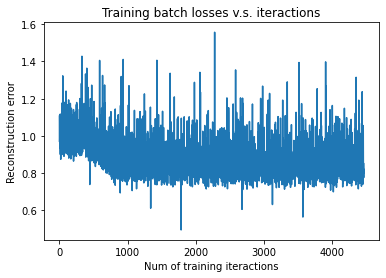

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
RBM: 419
Accuracy Score :
0.992644089815839
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.12      0.51      0.19        98

    accuracy                           0.99     56961
   macro avg       0.56      0.75      0.59     56961
weighted avg       1.00      0.99      0.99     56961

AUC :
0.9681673137045825
Fraud Fbeta Score: 
0.30750307503075036
Non-Fraud Fbeta Score: 
0.9946054818445592


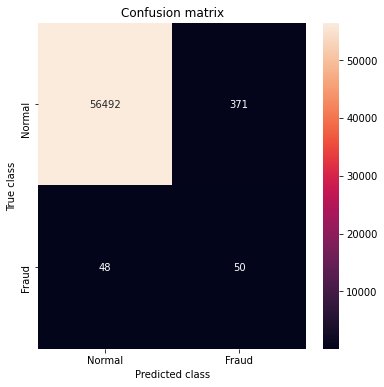

___________________________________________________________________________________________________

Fold No: 4
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
Validation cost at step 0: 0.99431646
Validation cost at step 1: 0.89377266
Validation cost at step 2: 0.8924292
Validation cost at step 3: 0.89303607
Validation cost at step 4: 0.89112747
Validation cost at step 5: 0.8900134
Validation cost at step 6: 0.8857828
Validation cost at step 7: 0.8887983
Validation cost at step 8: 0.88614243
Validation cost at step 9: 0.88440514


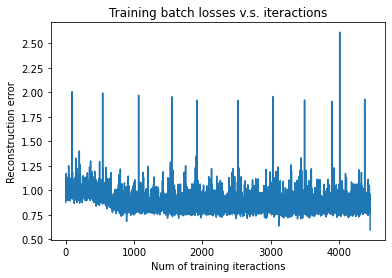

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
RBM: 467
Accuracy Score :
0.9918014079808992
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.12      0.58      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.79      0.60     56961
weighted avg       1.00      0.99      0.99     56961

AUC :
0.948832083701356
Fraud Fbeta Score: 
0.3257142857142857
Non-Fraud Fbeta Score: 
0.9938541189729864


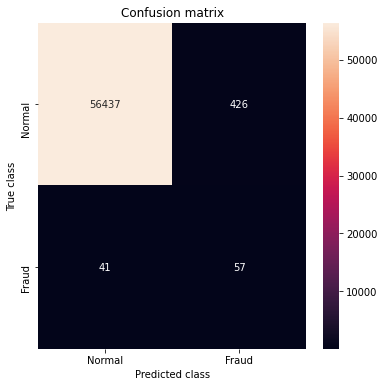

___________________________________________________________________________________________________

Fold No: 5
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
Validation cost at step 0: 0.9647001
Validation cost at step 1: 0.8650746
Validation cost at step 2: 0.85772294
Validation cost at step 3: 0.8546195
Validation cost at step 4: 0.85240895
Validation cost at step 5: 0.8464625
Validation cost at step 6: 0.8458184
Validation cost at step 7: 0.84517497
Validation cost at step 8: 0.84542423
Validation cost at step 9: 0.84895056


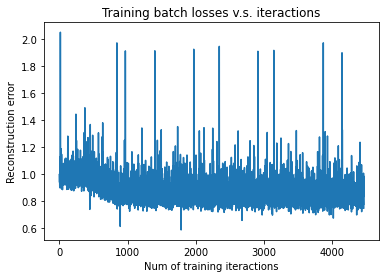

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
RBM: 430
Accuracy Score :
0.9924509752286652
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.12      0.54      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.77      0.60     56961
weighted avg       1.00      0.99      0.99     56961

AUC :
0.9424000470877552
Fraud Fbeta Score: 
0.31927710843373497
Non-Fraud Fbeta Score: 
0.9944185227572849


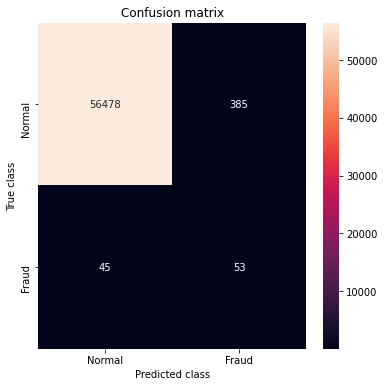

___________________________________________________________________________________________________



--------------------------------------- Performance Summary of All Folds ---------------------------------------
[0 1]
RBM: 2180
Accuracy Score :
0.9923456937505047
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.12      0.53      0.19       492

    accuracy                           0.99    284807
   macro avg       0.56      0.76      0.59    284807
weighted avg       1.00      0.99      0.99    284807

AUC :
0.9529365295191737
Fraud Fbeta Score: 
0.3123504068932504
Non-Fraud Fbeta Score: 
0.9943466137787115


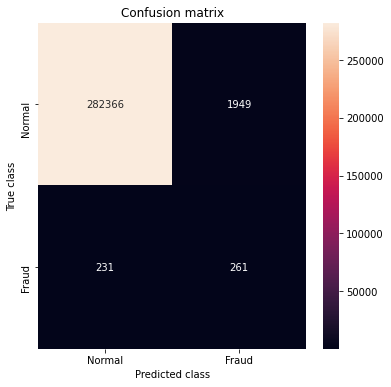

In [ ]:
# Testing RBM on 5 folds
do_cv_class(data, 5, "RBM")


Fold No: 1
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Isolation Forest: 131
Accuracy Score :
0.9977002212000983
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.31      0.32        99

    accuracy                           1.00     56962
   macro avg       0.66      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Fbeta Score: 
0.3163265306122449
Non-Fraud Fbeta Score: 
0.9988745075970737


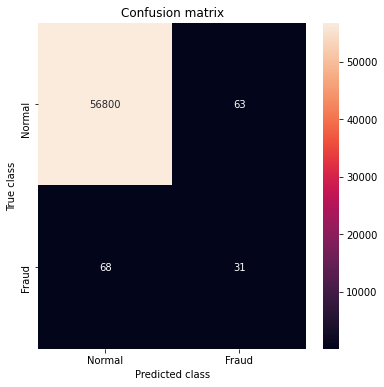

___________________________________________________________________________________________________

Fold No: 2
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Isolation Forest: 141
Accuracy Score :
0.997524665566518
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.32      0.31        99

    accuracy                           1.00     56962
   macro avg       0.65      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Fbeta Score: 
0.3187250996015936
Non-Fraud Fbeta Score: 
0.9987232156675155


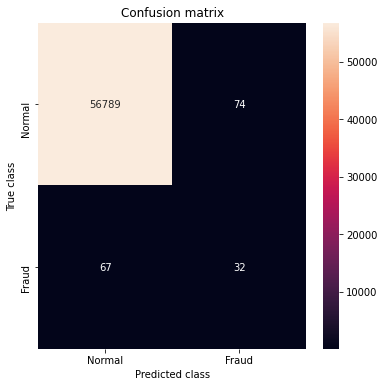

___________________________________________________________________________________________________

Fold No: 3
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Isolation Forest: 125
Accuracy Score :
0.9978055160548446
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.35      0.33      0.34        98

    accuracy                           1.00     56961
   macro avg       0.68      0.66      0.67     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.33126293995859213
Non-Fraud Fbeta Score: 
0.998937824016432


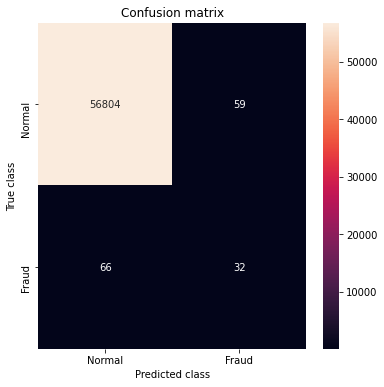

___________________________________________________________________________________________________

Fold No: 4
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Isolation Forest: 162
Accuracy Score :
0.9971559488070785
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.26      0.36      0.30        98

    accuracy                           1.00     56961
   macro avg       0.63      0.68      0.65     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.3326996197718631
Non-Fraud Fbeta Score: 
0.9983853890016499


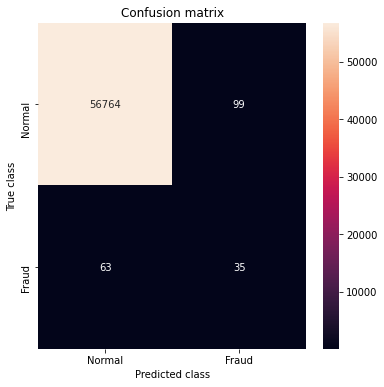

___________________________________________________________________________________________________

Fold No: 5
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Isolation Forest: 121
Accuracy Score :
0.9978757395410895
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.36      0.30      0.32        98

    accuracy                           1.00     56961
   macro avg       0.68      0.65      0.66     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.30655391120507397
Non-Fraud Fbeta Score: 
0.9990257867563271


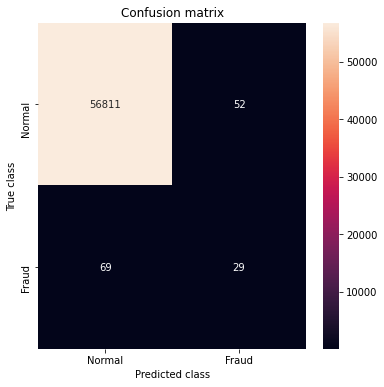

___________________________________________________________________________________________________



--------------------------------------- Performance Summary of All Folds ---------------------------------------
[0 1]
Isolation Forest: 680
Accuracy Score :
0.9976124182341024
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.32      0.32       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

Fraud Fbeta Score: 
0.3213419563459983
Non-Fraud Fbeta Score: 
0.9987893590215263


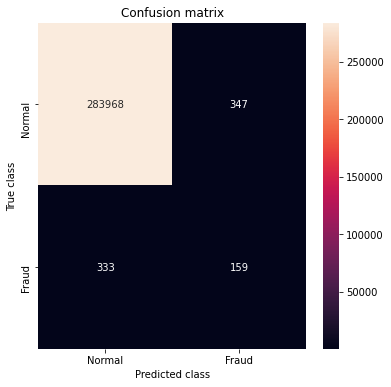

In [ ]:
# Testing Isolation Forest on 5 folds
do_cv_class(data, 5, "Isolation Forest")


Fold No: 1
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Support Vector Machine: 496
Accuracy Score :
0.991292440574418
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.09      0.46      0.16        99

    accuracy                           0.99     56962
   macro avg       0.55      0.73      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Fraud Fbeta Score: 
0.2598870056497175
Non-Fraud Fbeta Score: 
0.993572246191776


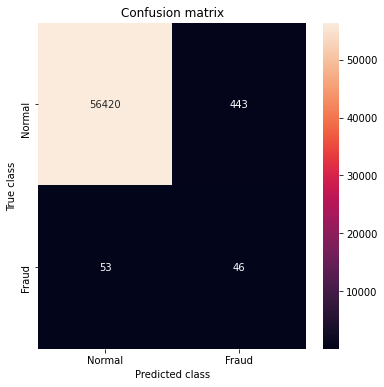

___________________________________________________________________________________________________

Fold No: 2
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Support Vector Machine: 508
Accuracy Score :
0.9910817738141217
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.10      0.51      0.16        99

    accuracy                           0.99     56962
   macro avg       0.55      0.75      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Fraud Fbeta Score: 
0.27624309392265195
Non-Fraud Fbeta Score: 
0.9933604550818057


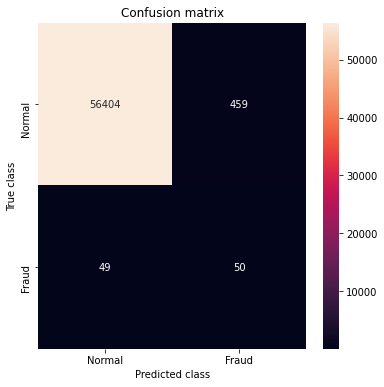

___________________________________________________________________________________________________

Fold No: 3
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Support Vector Machine: 488
Accuracy Score :
0.9914327346781131
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.10      0.48      0.16        98

    accuracy                           0.99     56961
   macro avg       0.55      0.74      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Fraud Fbeta Score: 
0.2682648401826484
Non-Fraud Fbeta Score: 
0.9936639089349805


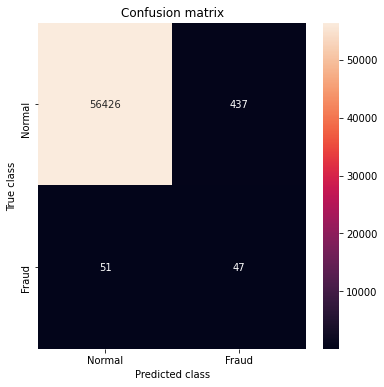

___________________________________________________________________________________________________

Fold No: 4
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Support Vector Machine: 573
Accuracy Score :
0.9899404855954074
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.08      0.44      0.13        98

    accuracy                           0.99     56961
   macro avg       0.54      0.71      0.56     56961
weighted avg       1.00      0.99      0.99     56961

Fraud Fbeta Score: 
0.2256033578174187
Non-Fraud Fbeta Score: 
0.9925066583994476


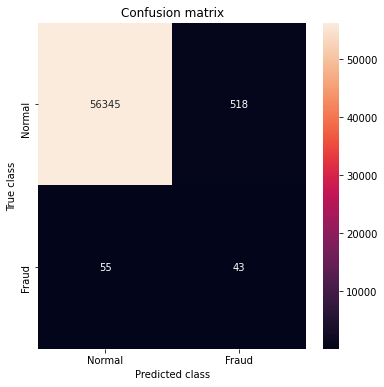

___________________________________________________________________________________________________

Fold No: 5
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Support Vector Machine: 525
Accuracy Score :
0.9907831674303471
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.08      0.43      0.14        98

    accuracy                           0.99     56961
   macro avg       0.54      0.71      0.57     56961
weighted avg       1.00      0.99      0.99     56961

Fraud Fbeta Score: 
0.23255813953488372
Non-Fraud Fbeta Score: 
0.9931948348373735


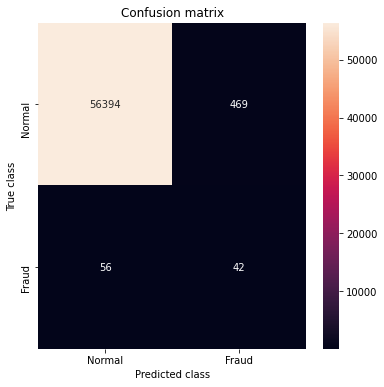

___________________________________________________________________________________________________



--------------------------------------- Performance Summary of All Folds ---------------------------------------
[0 1]
Support Vector Machine: 2590
Accuracy Score :
0.9909061223916547
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.09      0.46      0.15       492

    accuracy                           0.99    284807
   macro avg       0.54      0.73      0.57    284807
weighted avg       1.00      0.99      0.99    284807

Fraud Fbeta Score: 
0.25210084033613445
Non-Fraud Fbeta Score: 
0.9932596601792305


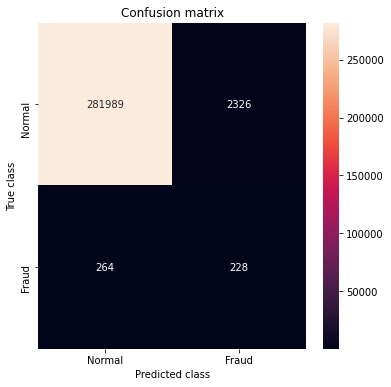

In [ ]:
# Testing One Class SVM on 5 folds
do_cv_class(data, 5, "Support Vector Machine")


Fold No: 1
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning:

Can save best model only with val_loss available, skipping.




------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Autoencoder: 250
Accuracy Score :
0.995611109160493
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.16      0.35      0.22        99

    accuracy                           1.00     56962
   macro avg       0.58      0.68      0.61     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Fbeta Score: 
0.2836304700162074
Non-Fraud Fbeta Score: 
0.9971568617101758


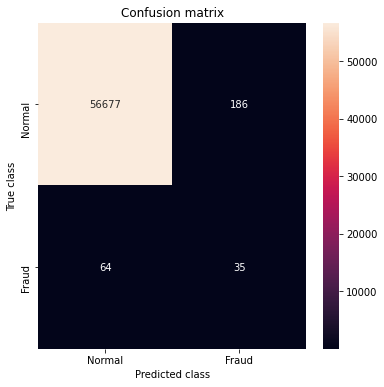

___________________________________________________________________________________________________

Fold No: 2
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=393, Test: 0=56863, 1=99

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Autoencoder: 258
Accuracy Score :
0.9954706646536288
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.17      0.40      0.24        99

    accuracy                           1.00     56962
   macro avg       0.58      0.70      0.62     56962
weighted avg       1.00      1.00      1.00     56962

Fraud Fbeta Score: 
0.31496062992125984
Non-Fraud Fbeta Score: 
0.9969912905779891


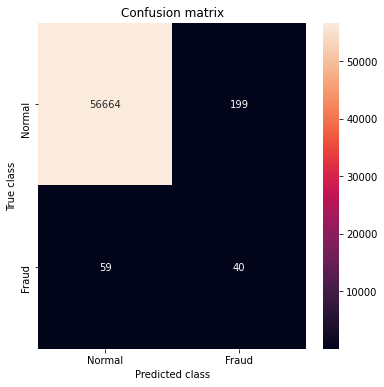

___________________________________________________________________________________________________

Fold No: 3
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Autoencoder: 240
Accuracy Score :
0.9957865908253015
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.17      0.39      0.24        98

    accuracy                           1.00     56961
   macro avg       0.59      0.69      0.62     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.3114754098360656
Non-Fraud Fbeta Score: 
0.9972554056193811


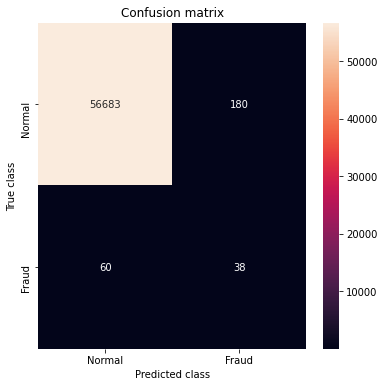

___________________________________________________________________________________________________

Fold No: 4
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Autoencoder: 253
Accuracy Score :
0.9955583644950053
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.19      0.50      0.28        98

    accuracy                           1.00     56961
   macro avg       0.60      0.75      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.3798449612403101
Non-Fraud Fbeta Score: 
0.9969559403153152


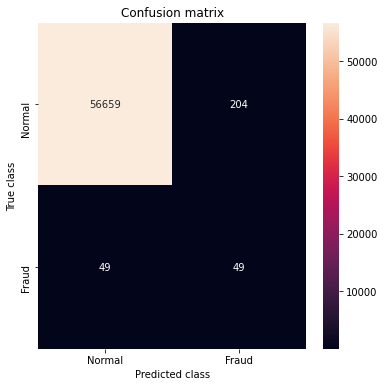

___________________________________________________________________________________________________

Fold No: 5
------------------------------- Summary of Target Variable -------------------------------
>Train: 0=227452, 1=394, Test: 0=56863, 1=98

------------------------------- Performance Evaluation For This Fold -------------------------------
[0 1]
Autoencoder: 250
Accuracy Score :
0.995611032109689
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.18      0.42      0.25        98

    accuracy                           1.00     56961
   macro avg       0.59      0.71      0.62     56961
weighted avg       1.00      1.00      1.00     56961

Fraud Fbeta Score: 
0.3274760383386581
Non-Fraud Fbeta Score: 
0.9970828245577612


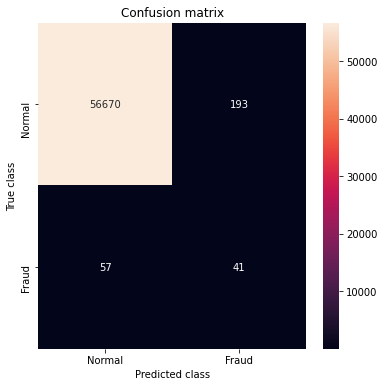

___________________________________________________________________________________________________



--------------------------------------- Performance Summary of All Folds ---------------------------------------
[0 1]
Autoencoder: 1251
Accuracy Score :
0.9956075517806795
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.17      0.41      0.25       492

    accuracy                           1.00    284807
   macro avg       0.59      0.70      0.62    284807
weighted avg       1.00      1.00      1.00    284807

Fraud Fbeta Score: 
0.3239706351739547
Non-Fraud Fbeta Score: 
0.9970884691555083


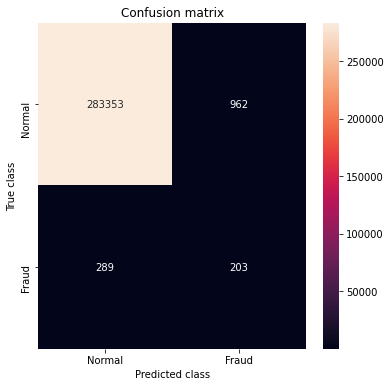

In [ ]:
# Testing Autoencoder on 5 folds
do_cv_class(data, 5, "Autoencoder")

## Common ROC Plot


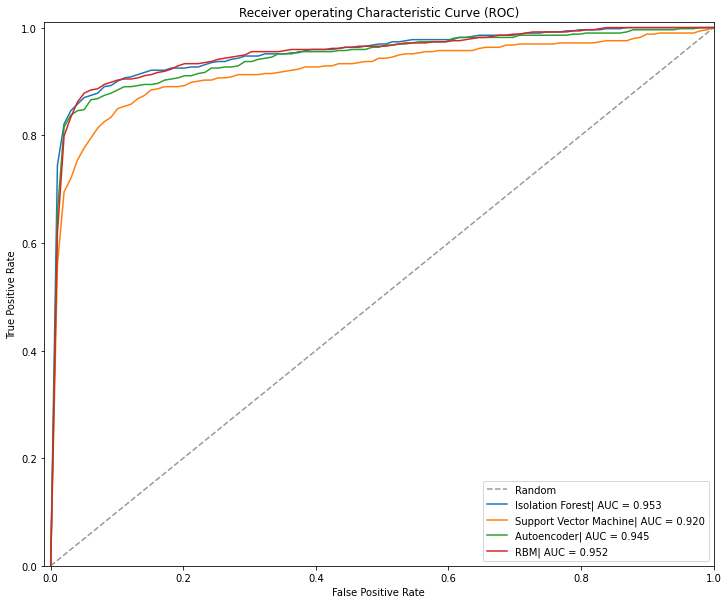

In [ ]:
def get_mean_tpr_fpr(model_name):
    '''
    Read tpr and fpr for given model from the drive
    '''
    filename = final_dir+'input/Output/' + model_name + '_' + 'mean_tpr' + '.txt'
    mean_tpr = open(filename).read().splitlines()
    mean_tpr = np.asarray(mean_tpr)
    mean_tpr = mean_tpr.astype(float)

    filename = final_dir+'input/Output/' + model_name + '_' + 'mean_fpr' + '.txt'
    mean_fpr = open(filename).read().splitlines()
    mean_fpr = np.asarray(mean_fpr)
    mean_fpr = mean_fpr.astype(float)
    
    roc_values = [mean_fpr, mean_tpr]
    
    return roc_values

curve_dict = {}

model_name = "Isolation Forest"
roc_values = get_mean_tpr_fpr(model_name)
curve_dict.update({model_name : roc_values})

model_name = "Support Vector Machine"
roc_values = get_mean_tpr_fpr(model_name)
curve_dict.update({model_name : roc_values})

model_name = "Autoencoder"
roc_values = get_mean_tpr_fpr(model_name)
curve_dict.update({model_name : roc_values})

model_name = "RBM"
roc_values = get_mean_tpr_fpr(model_name)
curve_dict.update({model_name : roc_values})

plt.subplots(figsize=(12,10))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

for key,value in curve_dict.items():
    build_ROC_curve(value[0],value[1],key)
plt.show()

## Ensembling Models

### Overlap

In [ ]:
# Read model output for file
filename = final_dir+'Input/Output/Isolation Forest_y_pred.txt'
y_pred_isolation_forest = open(filename).read().splitlines()
y_pred_isolation_forest = list(map(int,y_pred_isolation_forest))

filename = final_dir+'Input/Output/RBM_y_pred.txt'
y_pred_rbm = open(filename).read().splitlines()
y_pred_rbm = list(map(int,y_pred_rbm))

filename = final_dir+'Input/Output/Support Vector Machine_y_pred.txt'
y_pred_one_class_svm = open(filename).read().splitlines()
y_pred_one_class_svm = list(map(int,y_pred_one_class_svm))

filename = final_dir+'Input/Output/Autoencoder_y_pred.txt'
y_pred_autoencoder = open(filename).read().splitlines()
y_pred_autoencoder = list(map(int,y_pred_autoencoder))


filename = final_dir+'Input/Output/_Y_test_last_fold.txt'
y_test_last = open(filename).read().splitlines()
y_test_last = list(map(int,y_test_last))

In [ ]:
def common_rows(y_pred1, y_pred2, y_test_last = y_test_last):
    '''
    Definition: Get overlap between two model results
    Input: Predictions of the two models, truth values
    Output: 
      - Count of common frauds detected
      - Count of common actual frauds detected
    '''
    y_pred1 = np.asarray(y_pred1)
    y_pred2 = np.asarray(y_pred2)
    y_test_last = np.asarray(y_test_last)
    common_fraud_count = sum((y_pred1==y_pred2) & (y_pred1 == 1))
    actual_common_fraud_count = sum((y_pred1==y_pred2) & (y_pred1 == 1) & (y_test_last==1))
    return common_fraud_count, actual_common_fraud_count   

In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_isolation_forest, y_pred_rbm)
print('y_pred_isolation_forest_fraud_count:',sum(y_pred_isolation_forest))
print('y_pred_rbm_fraud_count:',sum(y_pred_rbm))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_isolation_forest_fraud_count: 81
y_pred_rbm_fraud_count: 438
common_fraud_count: 81
actual_common_fraud_count: 29


In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_isolation_forest, y_pred_one_class_svm)
print('y_pred_isolation_forest_fraud_count:',sum(y_pred_isolation_forest))
print('y_pred_one_class_svm_fraud_count:',sum(y_pred_one_class_svm))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_isolation_forest_fraud_count: 81
y_pred_one_class_svm_fraud_count: 511
common_fraud_count: 63
actual_common_fraud_count: 18


In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_isolation_forest, y_pred_autoencoder)
print('y_pred_isolation_forest_fraud_count:',sum(y_pred_isolation_forest))
print('y_pred_autoencoder_fraud_count:',sum(y_pred_autoencoder))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_isolation_forest_fraud_count: 81
y_pred_autoencoder_fraud_count: 234
common_fraud_count: 80
actual_common_fraud_count: 29


In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_one_class_svm, y_pred_rbm)
print('y_pred_one_class_svm_fraud_count:',sum(y_pred_one_class_svm))
print('y_pred_rbm_fraud_count:',sum(y_pred_rbm))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_one_class_svm_fraud_count: 511
y_pred_rbm_fraud_count: 438
common_fraud_count: 253
actual_common_fraud_count: 32


In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_one_class_svm, y_pred_autoencoder)
print('y_pred_one_class_svm_fraud_count:',sum(y_pred_one_class_svm))
print('y_pred_autoencoder_fraud_count:',sum(y_pred_autoencoder))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_one_class_svm_fraud_count: 511
y_pred_autoencoder_fraud_count: 234
common_fraud_count: 158
actual_common_fraud_count: 24


In [ ]:
common_fraud_count, actual_common_fraud_count = common_rows(y_pred_rbm, y_pred_autoencoder)
print('y_pred_rbm_fraud_count:',sum(y_pred_rbm))
print('y_pred_autoencoder_fraud_count:',sum(y_pred_autoencoder))
print('common_fraud_count:',common_fraud_count)
print('actual_common_fraud_count:',actual_common_fraud_count)

y_pred_rbm_fraud_count: 438
y_pred_autoencoder_fraud_count: 234
common_fraud_count: 233
actual_common_fraud_count: 41


### Majority Voting

Majority voting approach takes label predictions from all the models and creates final predictions based on the majority.

In [ ]:
from collections import Counter
# If at least 1 model predicts a row as fraud then consider the row as fraud
majority_vote_pred = []
for i in range(len(y_pred_rbm)):
    temp = []
    temp.extend((y_pred_rbm[i], y_pred_autoencoder[i], y_pred_isolation_forest[i], y_pred_one_class_svm[i]))
    vote_count = Counter(temp)
    if y_pred_isolation_forest[i] == 1 or vote_count[1] > 1:
        majority_vote_pred.append(1)
    else:
        majority_vote_pred.append(0)

Accuracy Score :
0.9942416741279121
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.15      0.50      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.75      0.61     56961
weighted avg       1.00      0.99      1.00     56961

Fraud Fbeta Score: 
0.34027777777777773


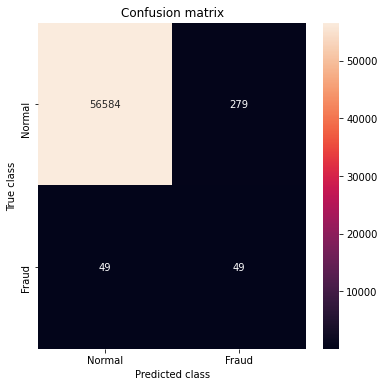

'\nIF: 29\n0 : 63\n1 : 49\n2: 35\n3: 18\n'

In [ ]:
# Get performance values for majority voting ensemble
print("Accuracy Score :")
print(accuracy_score(y_test_last, majority_vote_pred))
print("Classification Report :")
print(classification_report(y_test_last, majority_vote_pred))
print("Fraud Fbeta Score: ")
print(fbeta_score(y_test_last, majority_vote_pred, pos_label = 1, average = 'binary', beta = 2))
conf_matrix = confusion_matrix(y_test_last, majority_vote_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Anomaly Score based Ensembling







In [ ]:
def get_y_pred_y_proba(model_name):
    '''
    Get predictions and probabilities corresponding to each model from the drive
    '''   
    filename = final_dir+'input/Output/' + model_name + '_' + 'y_proba' + '.txt'
    y_proba = open(filename).read().splitlines()
    y_proba = np.asarray(y_proba)
    y_proba = list(y_proba.astype(float))

    filename = final_dir+'input/Output/' + model_name + '_' + 'y_pred' + '.txt'
    y_pred = open(filename).read().splitlines()
    y_pred = list(map(int,y_pred))

    return y_pred, y_proba

# Get prediction and probabilities for all models
rbm_y_pred, rbm_y_proba = get_y_pred_y_proba('RBM')
autoencoder_y_pred, autoencoder_y_proba = get_y_pred_y_proba('Autoencoder')
isolation_forest_y_pred, isolation_forest_y_proba = get_y_pred_y_proba('Isolation Forest')
# one_class_svm_y_pred, one_class_svm_y_proba = get_y_pred_y_proba('Support Vector Machine')

In [ ]:
import statistics
# For each row, get minimum value of anomaly score across all models
min_normalized_y_proba_minmax = [min(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]
# For each row, get maximum value of anomaly score across all models
max_normalized_y_proba_minmax = [max(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]
# For each row, get mean value of anomaly score across all models
mean_normalized_y_proba_minmax = [statistics.mean(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]

Plotting AUC curves to select the standardization type and metric combination to be used

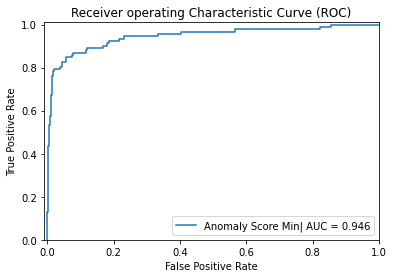

In [ ]:
# Standardization: Minmax   Metric: Minimum 
fpr, tpr, thresholds = roc_curve(Y_val, min_normalized_y_proba_minmax)
build_ROC_curve(fpr,tpr,'Anomaly Score Min')

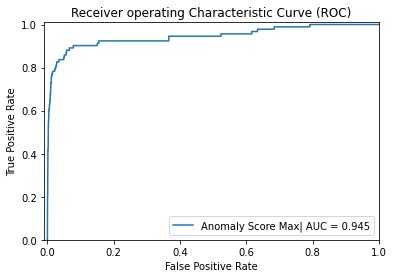

In [ ]:
# Standardization: Minmax   Metric: Maximum 
fpr, tpr, thresholds = roc_curve(Y_val, max_normalized_y_proba_minmax)
build_ROC_curve(fpr,tpr,'Anomaly Score Max')

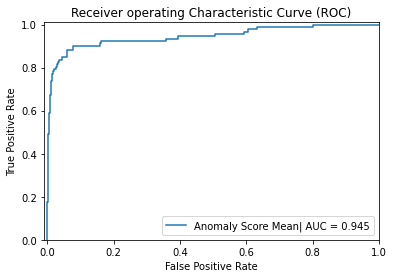

In [ ]:
# Standardization: Minmax   Metric: Mean 
fpr, tpr, thresholds = roc_curve(Y_val, mean_normalized_y_proba_minmax)
build_ROC_curve(fpr,tpr,'Anomaly Score Mean') 

In [ ]:
# Getting z score normalized values
rbm_normalized_y_proba = normalize_anomaly_score(rbm_y_proba, 'zscore')
autoencoder_normalized_y_proba = normalize_anomaly_score(autoencoder_y_proba, 'zscore')
isolation_forest_normalized_y_proba = normalize_anomaly_score(isolation_forest_y_proba, 'zscore')

------ Mean Values -------
1.2401806123102739e-18
7.160495960399736e-18
2.2405458862903868e-15


In [ ]:
import statistics
# Combining scores based on each metric
min_normalized_y_proba_zscore = [min(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]
max_normalized_y_proba_zscore = [max(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]
mean_normalized_y_proba_zscore = [statistics.mean(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]

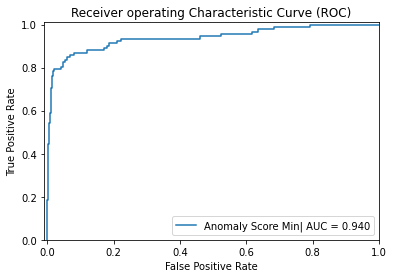

In [ ]:
# Standardization: Zscore   Metric: Minimum
fpr, tpr, thresholds = roc_curve(Y_val, min_normalized_y_proba_zscore)
build_ROC_curve(fpr,tpr,'Anomaly Score Min')

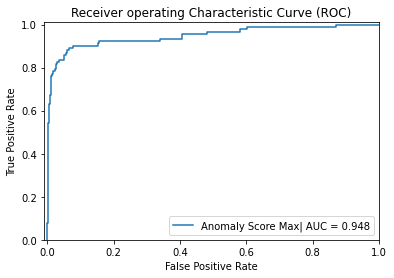

In [ ]:
# Standardization: Zscore   Metric: Maximum
fpr, tpr, thresholds = roc_curve(Y_val, max_normalized_y_proba_zscore)
build_ROC_curve(fpr,tpr,'Anomaly Score Max')

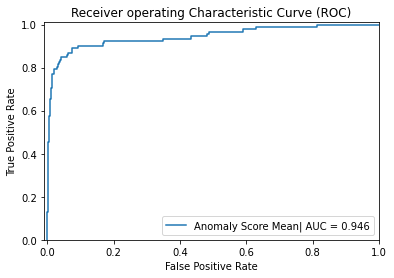

In [ ]:
# Standardization: Zscore   Metric: Mean
fpr, tpr, thresholds = roc_curve(Y_val, mean_normalized_y_proba_zscore)
build_ROC_curve(fpr,tpr,'Anomaly Score Mean')

After selecting the standardization type and the metric for combining the anomaly scores based on the AUC, we will compute percentile values for the final scores so as to get the try out different thresholds 

### Computing model results for all thresholds

#### Ensemble Thresholding

In [ ]:
from scipy import stats
def normalize_anomaly_score(data, normalization_type):
    '''
    Definition: Function to normalize the anomaly score
    Input:
      - data: Input feature containing the anomaly scores
      - normalization_type: Specifying the type of normalization
    Output:
      - Returns the standardized scores
    '''

    # Check for normalization type and then do the normalization
    if normalization_type == 'minmax':
      return list((data - np.min(data)) / (np.max(data) - np.min(data)))
    elif normalization_type == 'zscore':
      return list(stats.zscore(data))

def get_y_pred_y_proba(model_name):  
    filename = final_dir+'input/Output/' + model_name + '_' + 'y_proba' + '.txt'
    y_proba = open(filename).read().splitlines()
    y_proba = np.asarray(y_proba)
    y_proba = list(y_proba.astype(float))

    filename = final_dir+'input/Output/' + model_name + '_' + 'y_pred' + '.txt'
    y_pred = open(filename).read().splitlines()
    y_pred = list(map(int,y_pred))

    return y_pred, y_proba

def ensemble_evaluate(y_pred_ensemble, Y_test):
  print('Unique Counts: \n', np.unique(y_pred_ensemble, return_counts=True))

  print("AUC: ")
  from sklearn.metrics import roc_auc_score as auc
  print(auc(Y_test, y_pred_ensemble))
  from sklearn.metrics import precision_recall_curve
  precision, recall, _ = precision_recall_curve(Y_test, y_pred_ensemble)
  print("AUPR: ")
  from sklearn.metrics import roc_curve, auc
  print(auc(recall, precision))
  print("Fraud Fbeta Score: ")
  print(fbeta_score(Y_test, y_pred_ensemble, pos_label = 1, average = 'binary', beta = 2))

  print("Accuracy Score: ")
  print(accuracy_score(Y_test, y_pred_ensemble))
  print("Classification Report: ")
  print(classification_report(Y_test, y_pred_ensemble))
  conf_matrix = confusion_matrix(Y_test, y_pred_ensemble)

  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

In [ ]:
import statistics
# Get output probabilities for all models
rbm_y_pred, rbm_y_proba = get_y_pred_y_proba('RBM')
autoencoder_y_pred, autoencoder_y_proba = get_y_pred_y_proba('Autoencoder')
isolation_forest_y_pred, isolation_forest_y_proba = get_y_pred_y_proba('Isolation Forest')

# Get z-score standardized probabilities for all models
rbm_normalized_y_proba = normalize_anomaly_score(rbm_y_proba, 'zscore')
autoencoder_normalized_y_proba = normalize_anomaly_score(autoencoder_y_proba, 'zscore')
isolation_forest_normalized_y_proba = normalize_anomaly_score(isolation_forest_y_proba, 'zscore')

# Combine anomaly scores for all models based on the max criteria
max_normalized_y_proba_zscore = [max(x) for x in zip(rbm_normalized_y_proba, autoencoder_normalized_y_proba, isolation_forest_normalized_y_proba)]

# Get percentile values for the combined score
x = np.asarray(max_normalized_y_proba_zscore)
percentiles = [stats.percentileofscore(x, a, 'weak') for a in x]
percentiles = np.asarray(percentiles)

In [ ]:
# Checking counts of bother classes
np.unique(np.asarray(Y_test), return_counts = True)

(array([0, 1]), array([71079,   123]))

In [ ]:
# Creating a dictionary for storing true positives
curve_tp = {}
# Creating a dictionary for storing f2 scores
curve_dict = {}

--------------------- Threshold: 99.9 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([71130,    72]))
AUC: 
0.6257278486767901
AUPR: 
0.3419400872086584
Fraud Fbeta Score: 
0.2748226950354609
Accuracy Score: 
0.9981320749417151
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.25      0.32       123

    accuracy                           1.00     71202
   macro avg       0.71      0.63      0.66     71202
weighted avg       1.00      1.00      1.00     71202



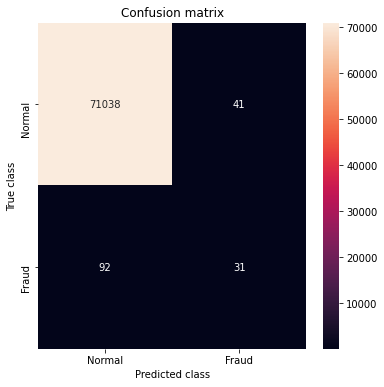





--------------------- Threshold: 99.5 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70845,   357]))
AUC: 
0.8191826408197819
AUPR: 
0.4320914491700242
Fraud Fbeta Score: 
0.4652532391048293
Accuracy Score: 
0.9954776551220471
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.22      0.64      0.33       123

    accuracy                           1.00     71202
   macro avg       0.61      0.82      0.66     71202
weighted avg       1.00      1.00      1.00     71202



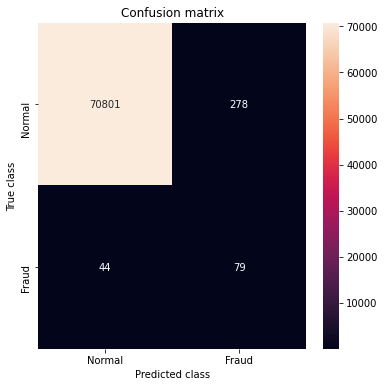





--------------------- Threshold: 99 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70489,   713]))
AUC: 
0.8818315862219949
AUPR: 
0.452995401327491
Fraud Fbeta Score: 
0.3941908713692946
Accuracy Score: 
0.9909272211454735
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.13      0.77      0.23       123

    accuracy                           0.99     71202
   macro avg       0.57      0.88      0.61     71202
weighted avg       1.00      0.99      0.99     71202



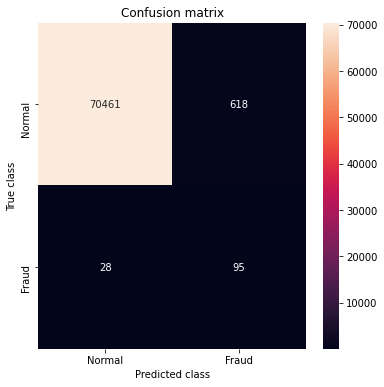





--------------------- Threshold: 95 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([67641,  3561]))
AUC: 
0.9147345155973824
AUPR: 
0.45429400406044496
Fraud Fbeta Score: 
0.13323464100666174
Accuracy Score: 
0.951293502991489
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.88      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202



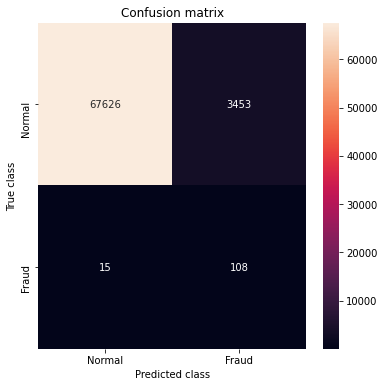





--------------------- Threshold: 90 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([64080,  7122]))
AUC: 
0.8978290730444551
AUPR: 
0.4549683109607821
Fraud Fbeta Score: 
0.07223535592329919
Accuracy Score: 
0.9013370410943513
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



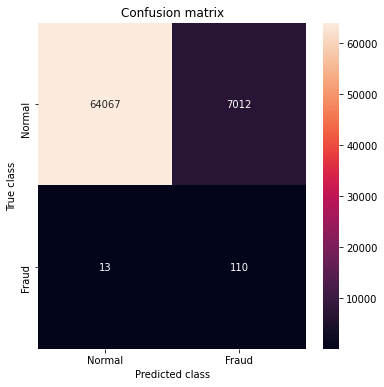

In [ ]:
# Creating list of thresholds to mark all rows which have percentile scores greater than the threshold as anomalies 
perc = [0.1, 0.5, 1, 5, 10]
threshold = [100 - x for x in perc]

model_name = 'Ensemble'
f2 = []
tp = []
for t in threshold: 
  anomaly_indices = np.where(percentiles >= t)
  y_pred_ensemble = np.zeros(len(Y_test))
  y_pred_ensemble[anomaly_indices] = 1

  conf_matrix = confusion_matrix(Y_test, y_pred_ensemble)

  # Appending the true positives for ensemble mdoel for each threshold
  tp.append(np.diag(conf_matrix)[1])
  
  # Appending the f2 score for ensemble mdoel for each threshold
  f2.append(fbeta_score(Y_test, y_pred_ensemble, pos_label = 1, average = 'binary', beta = 2))
  print('--------------------- Threshold: ' + str(t) + ' --------------------------------------------------------\n')
  ensemble_evaluate(y_pred_ensemble, Y_test)
  print('\n')
  print('\n')

In [ ]:
# Updating the dictionary with f2 score and tp for ensemble model across different thresholds
curve_dict.update({model_name : f2})
curve_tp.update({model_name : tp})

In [ ]:
rbm_y_pred, rbm_y_proba = get_y_pred_y_proba('RBM')
autoencoder_y_pred, autoencoder_y_proba = get_y_pred_y_proba('Autoencoder')
isolation_forest_y_pred, isolation_forest_y_proba = get_y_pred_y_proba('Isolation Forest')

rbm_normalized_y_proba = normalize_anomaly_score(rbm_y_proba, 'zscore')
autoencoder_normalized_y_proba = normalize_anomaly_score(autoencoder_y_proba, 'zscore')
isolation_forest_normalized_y_proba = normalize_anomaly_score(isolation_forest_y_proba, 'zscore')

#### RBM Thresholding

--------------------- Threshold: 99.9 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([71130,    72]))
AUC: 
0.6257278486767901
AUPR: 
0.3419400872086584
Fraud Fbeta Score: 
0.2748226950354609
Accuracy Score: 
0.9981320749417151
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.25      0.32       123

    accuracy                           1.00     71202
   macro avg       0.71      0.63      0.66     71202
weighted avg       1.00      1.00      1.00     71202



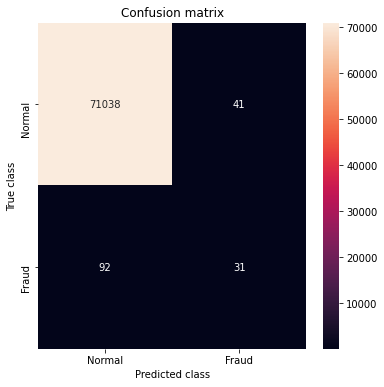





--------------------- Threshold: 99.5 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70845,   357]))
AUC: 
0.7173807638975389
AUPR: 
0.29562698417400074
Fraud Fbeta Score: 
0.31802120141342755
Accuracy Score: 
0.9947754276565265
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.15      0.44      0.23       123

    accuracy                           0.99     71202
   macro avg       0.58      0.72      0.61     71202
weighted avg       1.00      0.99      1.00     71202



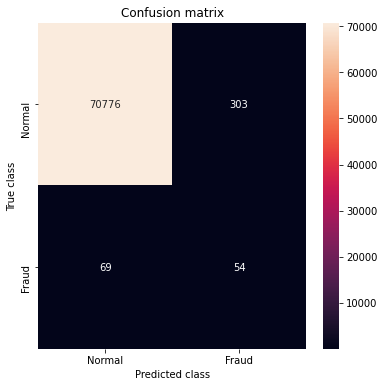





--------------------- Threshold: 99 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70489,   713]))
AUC: 
0.8248225351455389
AUPR: 
0.3863654722577162
Fraud Fbeta Score: 
0.3360995850622407
Accuracy Score: 
0.9905339737647819
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.11      0.66      0.19       123

    accuracy                           0.99     71202
   macro avg       0.56      0.82      0.59     71202
weighted avg       1.00      0.99      0.99     71202



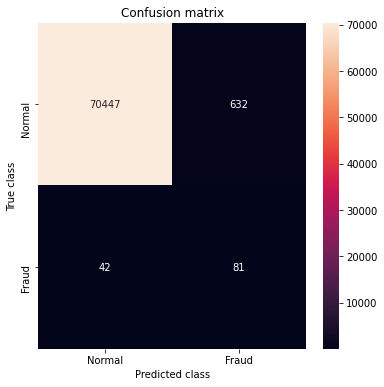





--------------------- Threshold: 95 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([67641,  3561]))
AUC: 
0.9188065906742721
AUPR: 
0.45849243243338805
Fraud Fbeta Score: 
0.13446829509005676
Accuracy Score: 
0.9513215920901098
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.89      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.92      0.52     71202
weighted avg       1.00      0.95      0.97     71202



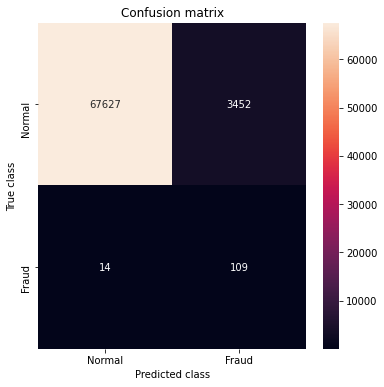





--------------------- Threshold: 90 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([64081,  7121]))
AUC: 
0.8978361074709384
AUPR: 
0.4549693954362554
Fraud Fbeta Score: 
0.07224484434519901
Accuracy Score: 
0.9013510856436617
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



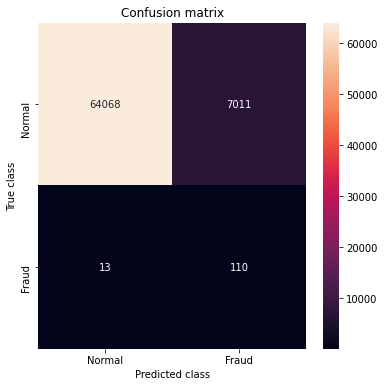

In [ ]:
x = np.asarray(rbm_normalized_y_proba)
percentiles = [stats.percentileofscore(x, a, 'weak') for a in x]
percentiles = np.asarray(percentiles)

perc = [0.1, 0.5, 1, 5, 10]
threshold = [100 - x for x in perc]

model_name = 'RBM'
f2 = []
tp = []

for t in threshold: 
  anomaly_indices = np.where(percentiles >= t)
  y_pred = np.zeros(len(Y_test))
  y_pred[anomaly_indices] = 1
  conf_matrix = confusion_matrix(Y_test, y_pred)
  tp.append(np.diag(conf_matrix)[1])
  f2.append(fbeta_score(Y_test, y_pred, pos_label = 1, average = 'binary', beta = 2))
  print('--------------------- Threshold: ' + str(t) + ' --------------------------------------------------------\n')
  ensemble_evaluate(y_pred, Y_test)
  print('\n')
  print('\n')

In [ ]:
curve_dict.update({model_name : f2})
curve_tp.update({model_name : tp})

#### Isolation Forest Thresholding

--------------------- Threshold: 99.9 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([71130,    72]))
AUC: 
0.6297999237536799
AUPR: 
0.3529425500288541
Fraud Fbeta Score: 
0.28368794326241137
Accuracy Score: 
0.9981601640403359
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.44      0.26      0.33       123

    accuracy                           1.00     71202
   macro avg       0.72      0.63      0.66     71202
weighted avg       1.00      1.00      1.00     71202



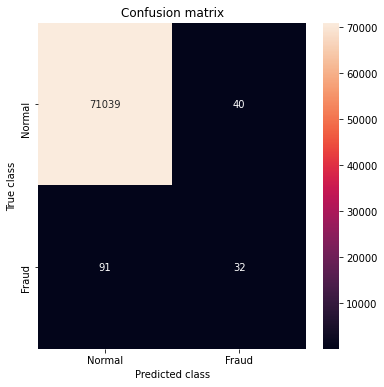





--------------------- Threshold: 99.5 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70845,   357]))
AUC: 
0.8191826408197819
AUPR: 
0.4320914491700242
Fraud Fbeta Score: 
0.4652532391048293
Accuracy Score: 
0.9954776551220471
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.22      0.64      0.33       123

    accuracy                           1.00     71202
   macro avg       0.61      0.82      0.66     71202
weighted avg       1.00      1.00      1.00     71202



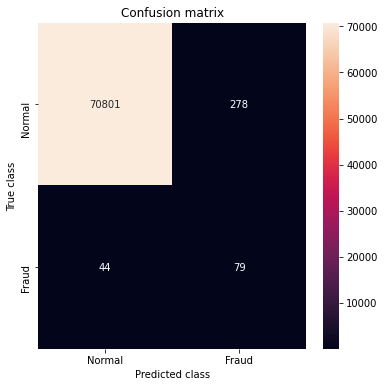





--------------------- Threshold: 99 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70489,   713]))
AUC: 
0.8859036612988845
AUPR: 
0.4577546819753321
Fraud Fbeta Score: 
0.3983402489626556
Accuracy Score: 
0.9909553102440942
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.13      0.78      0.23       123

    accuracy                           0.99     71202
   macro avg       0.57      0.89      0.61     71202
weighted avg       1.00      0.99      0.99     71202



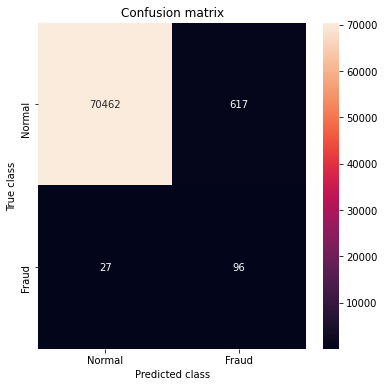





--------------------- Threshold: 95 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([67641,  3561]))
AUC: 
0.9147345155973824
AUPR: 
0.45429400406044496
Fraud Fbeta Score: 
0.13323464100666174
Accuracy Score: 
0.951293502991489
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.88      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202



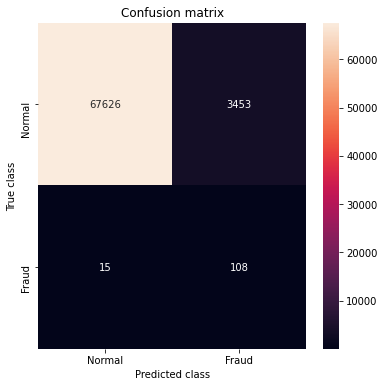





--------------------- Threshold: 90 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([64081,  7121]))
AUC: 
0.8978361074709384
AUPR: 
0.4549693954362554
Fraud Fbeta Score: 
0.07224484434519901
Accuracy Score: 
0.9013510856436617
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



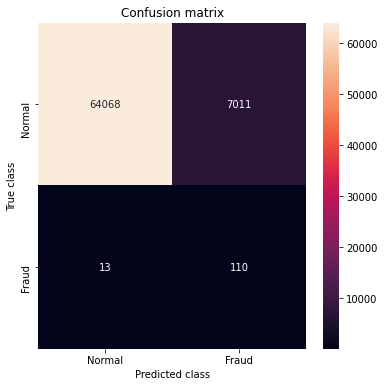

In [ ]:
x = np.asarray(isolation_forest_normalized_y_proba)
percentiles = [stats.percentileofscore(x, a, 'weak') for a in x]
percentiles = np.asarray(percentiles)

perc = [0.1, 0.5, 1, 5, 10]
threshold = [100 - x for x in perc]

model_name = 'Isolation Forest'
f2 = []
tp = []

for t in threshold: 
  anomaly_indices = np.where(percentiles >= t)
  y_pred = np.zeros(len(Y_test))
  y_pred[anomaly_indices] = 1

  conf_matrix = confusion_matrix(Y_test, y_pred)
  tp.append(np.diag(conf_matrix)[1])

  f2.append(fbeta_score(Y_test, y_pred, pos_label = 1, average = 'binary', beta = 2))

  print('--------------------- Threshold: ' + str(t) + ' --------------------------------------------------------\n')
  ensemble_evaluate(y_pred, Y_test)
  print('\n')
  print('\n')

In [ ]:
curve_dict.update({model_name : f2})
curve_tp.update({model_name : tp})

--------------------- Threshold: 99.9 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([71130,    72]))
AUC: 
0.6257278486767901
AUPR: 
0.3419400872086584
Fraud Fbeta Score: 
0.2748226950354609
Accuracy Score: 
0.9981320749417151
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.25      0.32       123

    accuracy                           1.00     71202
   macro avg       0.71      0.63      0.66     71202
weighted avg       1.00      1.00      1.00     71202



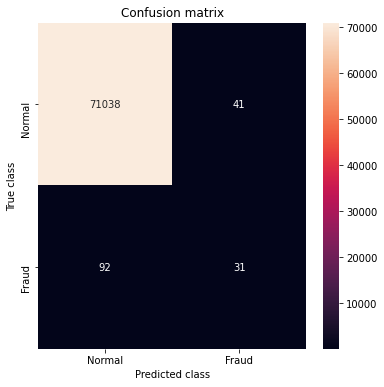





--------------------- Threshold: 99.5 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70845,   357]))
AUC: 
0.7581015146664362
AUPR: 
0.35021277017241015
Fraud Fbeta Score: 
0.3769140164899883
Accuracy Score: 
0.9950563186427348
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.18      0.52      0.27       123

    accuracy                           1.00     71202
   macro avg       0.59      0.76      0.63     71202
weighted avg       1.00      1.00      1.00     71202



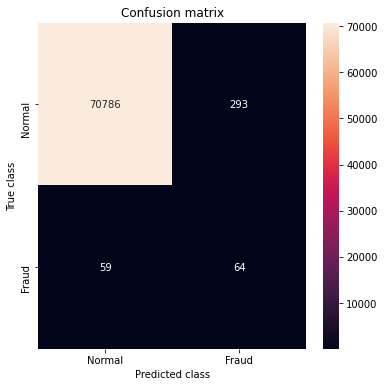





--------------------- Threshold: 99 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([70489,   713]))
AUC: 
0.8451829105299875
AUPR: 
0.4101618754969215
Fraud Fbeta Score: 
0.3568464730290456
Accuracy Score: 
0.990674419257886
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.12      0.70      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.85      0.60     71202
weighted avg       1.00      0.99      0.99     71202



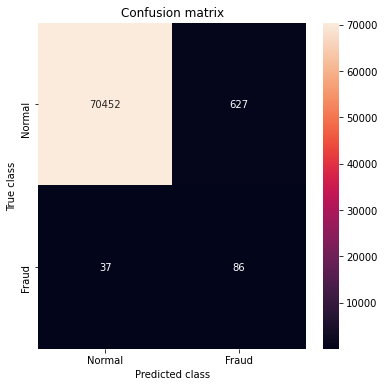





--------------------- Threshold: 95 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([67641,  3561]))
AUC: 
0.9065903654436029
AUPR: 
0.44589714731455876
Fraud Fbeta Score: 
0.1307673328398717
Accuracy Score: 
0.9512373247942474
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.86      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202



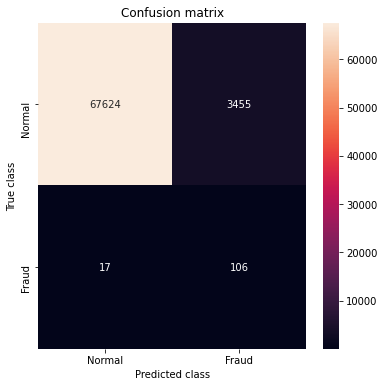





--------------------- Threshold: 90 --------------------------------------------------------

Unique Counts: 
 (array([0., 1.]), array([64081,  7121]))
AUC: 
0.8978361074709384
AUPR: 
0.4549693954362554
Fraud Fbeta Score: 
0.07224484434519901
Accuracy Score: 
0.9013510856436617
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



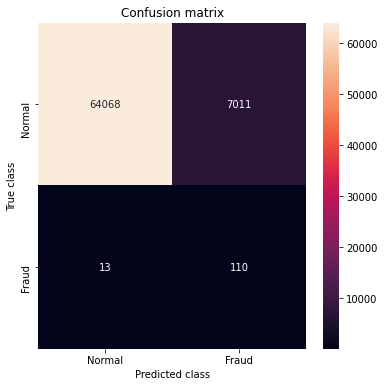

In [ ]:
x = np.asarray(autoencoder_normalized_y_proba)
percentiles = [stats.percentileofscore(x, a, 'weak') for a in x]
percentiles = np.asarray(percentiles)

perc = [0.1, 0.5, 1, 5, 10]
threshold = [100 - x for x in perc]

model_name = 'Autoencoder'
f2 = []
tp = []

for t in threshold: 
  anomaly_indices = np.where(percentiles >= t)
  y_pred = np.zeros(len(Y_test))
  y_pred[anomaly_indices] = 1
  f2.append(fbeta_score(Y_test, y_pred, pos_label = 1, average = 'binary', beta = 2))

  conf_matrix = confusion_matrix(Y_test, y_pred)
  tp.append(np.diag(conf_matrix)[1])

  print('--------------------- Threshold: ' + str(t) + ' --------------------------------------------------------\n')
  ensemble_evaluate(y_pred, Y_test)
  print('\n')
  print('\n')

In [ ]:
curve_dict.update({model_name : f2})
curve_tp.update({model_name : tp})

### Common True Positives

In [ ]:
import statistics
from sklearn.metrics import roc_curve, auc
def build_tp(tp,model_name):
    '''
    Definition: Computing a curve for plotting true positives across thresholds
    Input: Model name and list of true positives across thresholds
    Output: Plots the true positive curve
    '''
    perc = [0.1, 0.5, 1, 5, 10]
    threshold = [100 - x for x in perc]
    threshold = list(map(str,threshold))
    plt.plot(tp, label = str(model_name))
    plt.xticks([0, 1, 2, 3, 4], threshold)
    plt.title('True Positives across thresholds')
    plt.ylabel('True Positives')
    plt.xlabel('Thresholds')
    plt.legend(loc='lower right')

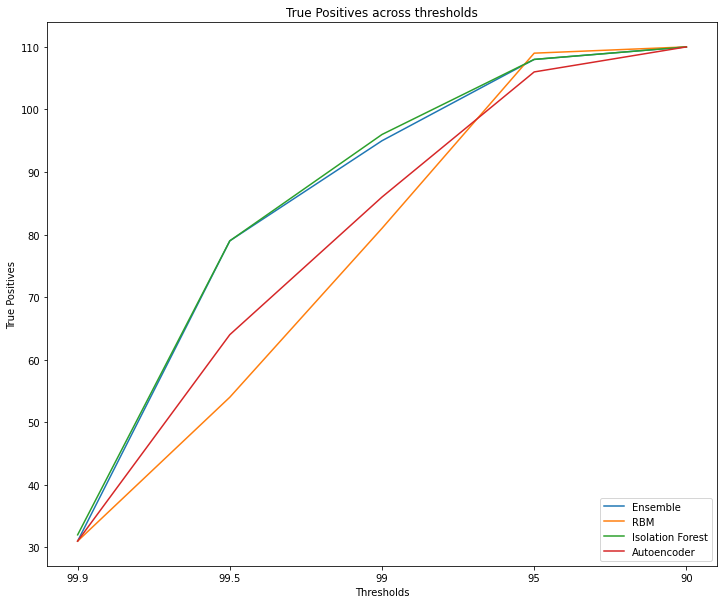

In [ ]:
plt.subplots(figsize=(12,10))

# Call build_tp for each model
for key,value in curve_tp.items():
    build_tp(value, key)
plt.show()

In [ ]:
curve_tp

{'Autoencoder': [31, 64, 86, 106, 110],
 'Ensemble': [31, 64, 86, 106, 110],
 'Isolation Forest': [32, 79, 96, 108, 110],
 'RBM': [31, 54, 81, 109, 110]}

### Common F2

In [ ]:
import statistics
from sklearn.metrics import roc_curve, auc
def build_f2(f2,model_name):
    '''
    Definition: Computing a curve for plotting f2 scores across thresholds
    Input: Model name and list of f2 socres across thresholds
    Output: Plots the f2 curve
    '''
    perc = [0.1, 0.5, 1, 5, 10]
    threshold = [100 - x for x in perc]
    threshold = list(map(str,threshold))
    #plt.plot(f2, label = str(model_name) + ' | F2 = %0.3f'% statistics.mean(f2))
    plt.plot(f2, label = str(model_name))
    plt.xticks([0, 1, 2, 3, 4], threshold)
    plt.title('F2 score across thresholds')
    plt.ylabel('F2 Score')
    plt.xlabel('Thresholds')
    plt.legend(loc='lower right')

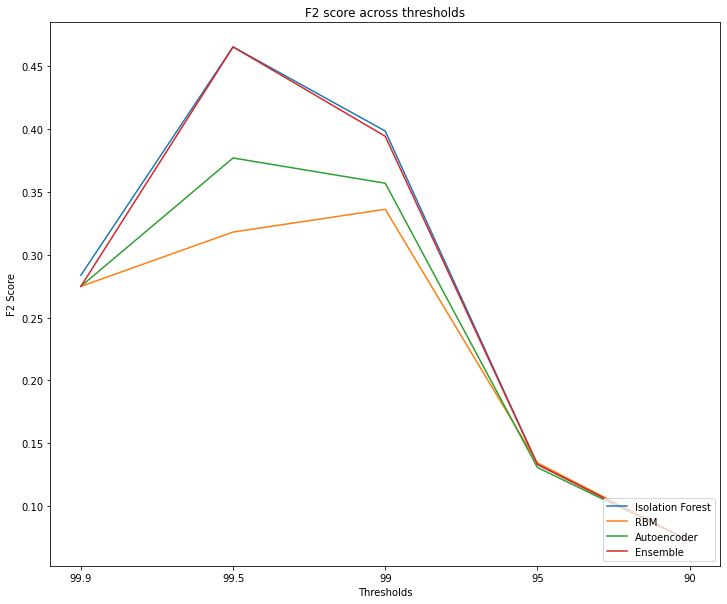

In [ ]:
plt.subplots(figsize=(12,10))

# Call build_f2 for each model 
for key,value in curve_dict.items():
    build_f2(value, key)
plt.show()

## Common ROC Test Performance

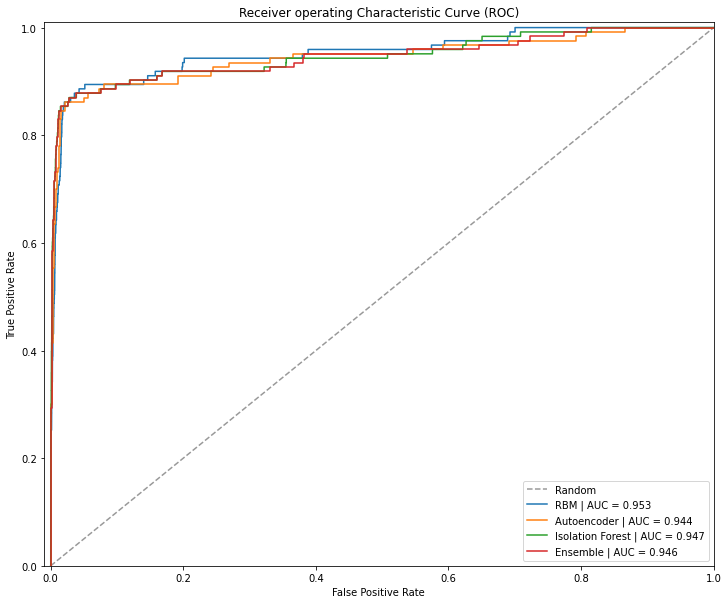

In [ ]:
from sklearn import metrics
# Creating a dicntionary to store fpr and tpr values for each model 
curve_dict = {}

#Caclulating the tpr and fpr for RBM Model
model_name = 'RBM'
fpr, tpr, thresholds = roc_curve(Y_test, rbm_y_proba)
roc_values = [fpr, tpr]
curve_dict.update({model_name : roc_values})

#Caclulating the tpr and fpr for Autoencoder Model
model_name = 'Autoencoder'
fpr, tpr, thresholds = roc_curve(Y_test, autoencoder_y_proba)
roc_values = [fpr, tpr]
curve_dict.update({model_name : roc_values})

#Caclulating the tpr and fpr for Isolation Forest Model
model_name = 'Isolation Forest'
fpr, tpr, thresholds = roc_curve(Y_test, isolation_forest_y_proba)
roc_values = [fpr, tpr]
curve_dict.update({model_name : roc_values})

#Caclulating the tpr and fpr for Ensemble approach
model_name = 'Ensemble'
fpr, tpr, thresholds = roc_curve(Y_test, max_normalized_y_proba_zscore)
roc_values = [fpr, tpr]
curve_dict.update({model_name : roc_values})

#Plotting a commom ROC plot along with the random line
plt.subplots(figsize=(12,10))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

for key,value in curve_dict.items():
    build_ROC_curve(value[0],value[1],key)
plt.show()

## Common AUPRC Test Performance

In [ ]:
def build_AUPRC_curve(precision,recall,model_name):

  '''
    Definition: Function to build the AUPRC curve
    Input: Precision value, recall value, model name
    Output: Plots an AUPRC curve for given model
    '''
  
  from sklearn.metrics import auc
  auprc = auc(recall,precision)

  plt.plot(recall, precision, marker = '.', label = str(model_name) + ' | AUPRC = %0.3f'% auprc)
    
  plt.xlim([-0.01, 1])
  plt.ylim([0, 1.01])
  plt.legend(loc='lower right')

  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')  

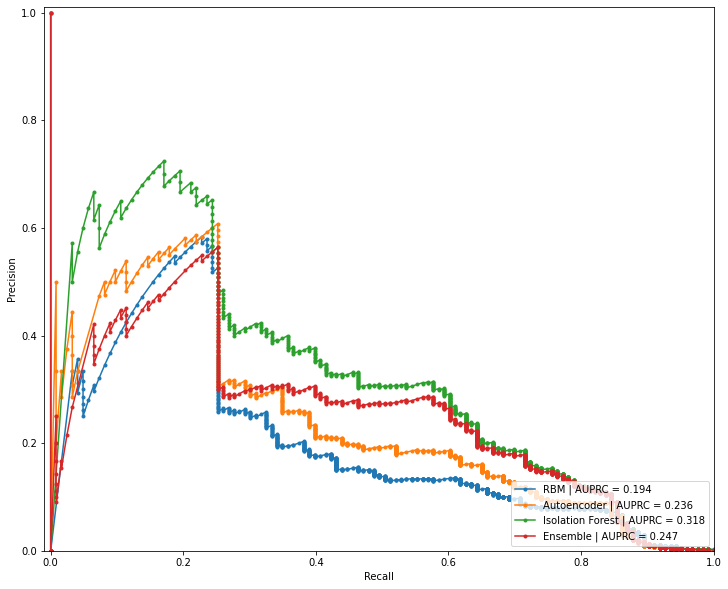

In [ ]:
from sklearn.metrics import precision_recall_curve
# Creating a dictionary to store precision and recall values for each model 
curve_dict = {}

#Caclulating the precision and recall for RBM Model
model_name = 'RBM'
precision, recall, _ = precision_recall_curve(Y_test, rbm_y_proba)
aupr_values = [precision, recall]
curve_dict.update({model_name : aupr_values})

#Caclulating the precision and recall for RBM Model
model_name = 'Autoencoder'
precision, recall, _ = precision_recall_curve(Y_test, autoencoder_y_proba)
aupr_values = [precision, recall]
curve_dict.update({model_name : aupr_values})

#Caclulating the precision and recall for RBM Model
model_name = 'Isolation Forest'
precision, recall, _ = precision_recall_curve(Y_test, isolation_forest_y_proba)
aupr_values = [precision, recall]
curve_dict.update({model_name : aupr_values})

#Caclulating the precision and recall for RBM Model
model_name = 'Ensemble'
precision, recall, _ = precision_recall_curve(Y_test, max_normalized_y_proba_zscore)
aupr_values = [precision, recall]
curve_dict.update({model_name : aupr_values})

#Plotting a common AUPRC plot using the dictionary and method defined above
plt.subplots(figsize=(12,10))
for key,value in curve_dict.items():
    from sklearn.metrics import roc_auc_score as auc
    build_AUPRC_curve(value[0],value[1],key)
plt.show()

## Appendix

#### Code to evaluate Autoencoder

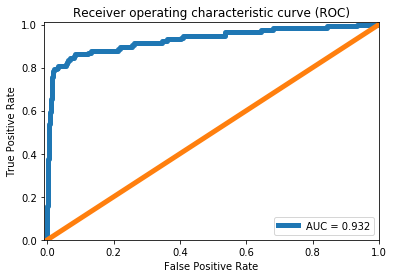

In [ ]:
#Calculating the false postive rate and true positive rate based on the error value and resconstruction error

false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

#Plotting the ROC along with the random using fpr & tpr values 
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

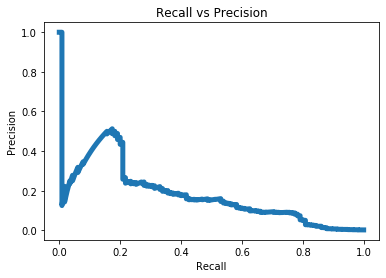

In [ ]:
#Calculating the precision and recall based on the error value and resconstruction error

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)

#Plotting the curve for Recall vs Precision
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

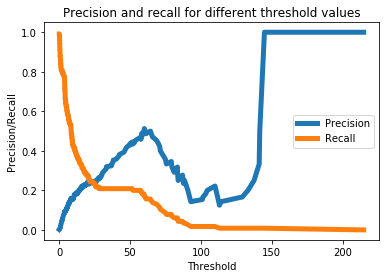

In [ ]:
#Plotting the curve for Recall vs Precision

plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

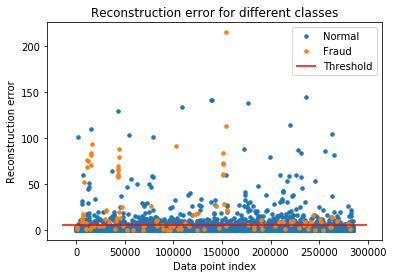

In [ ]:
#Plotting the reconstruction error for different data points

threshold_fixed = 5
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show(); 

#### Code to evaluate Restricted Boltsmann Machines

In [ ]:
# Getting the value of free energy for each row
test_cost = model.getFreeEnergy(test_x).reshape(-1)

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model/rbm_model.ckpt


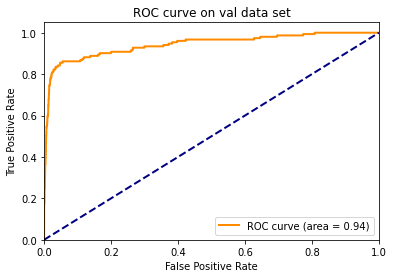

In [ ]:
# Plotting the ROC curve by calculating fpr and tpr values
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_y, test_cost)

fpr_micro, tpr_micro, _ = roc_curve(test_y, test_cost)
roc_auc = auc(fpr_micro, tpr_micro)

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve on val data set')
plt.legend(loc="lower right")
plt.show()

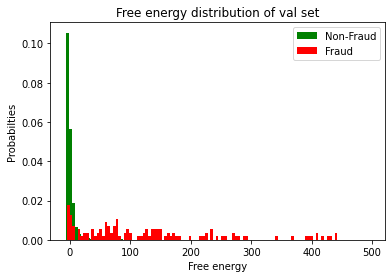

In [ ]:
# Plotting the free energy distribution for both fraud and non-fraud

plt.title('Free energy distribution of val set')
plt.xlabel('Free energy')
plt.ylabel('Probabilties')
# plt.hist(test_cost[(test_y == 0) & (test_cost < 500)], bins = 100, color='green', normed=1.0, label='Non-Fraud')
# plt.hist(test_cost[(test_y == 1) & (test_cost < 500)], bins = 100, color='red', normed=1.0, label = 'Fraud')
plt.hist(test_cost[(test_y == 0) & (test_cost < 500)], bins = 100, color='green', density=1.0, label='Non-Fraud')
plt.hist(test_cost[(test_y == 1) & (test_cost < 500)], bins = 100, color='red', density=1.0, label = 'Fraud')

plt.legend(loc="upper right")
plt.show()

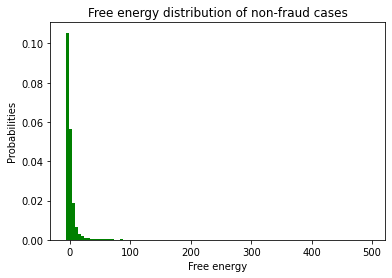

In [ ]:
# Plotting the free energy distribution for non-fraud cases

#plt.hist(test_cost[np.where(test_y == 1)], bins = 100)
# plt.hist(test_cost[(test_y == 0) & (test_cost < 500)], bins = 100, color='green', normed=1)
plt.hist(test_cost[(test_y == 0) & (test_cost < 500)], bins = 100, color='green', density=1)
plt.title('Free energy distribution of non-fraud cases')
plt.xlabel('Free energy')
plt.ylabel('Probabilities')
plt.show()

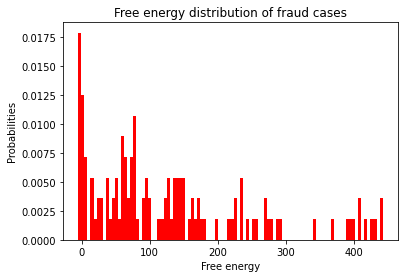

In [ ]:
# Plotting the free energy distribution for fraud cases

#plt.hist(test_cost[np.where(test_y == 1)], bins = 100)
# plt.hist(test_cost[(test_y == 1) & (test_cost < 500)], bins = 100, color='red', normed=1)
plt.hist(test_cost[(test_y == 1) & (test_cost < 500)], bins = 100, color='red', density=1)
plt.title('Free energy distribution of fraud cases')
plt.xlabel('Free energy')
plt.ylabel('Probabilities')
plt.show()